Shir Sharoni   |  209396589<br>
Shiraz Israeli |  209126259

**Necessary Imports**

In [1]:
# Data Analysis and visualization tools
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import statsmodels.api as sm
from sklearn import datasets, svm
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import metrics
from scipy.stats import normaltest, skewtest, shapiro, mannwhitneyu, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from typing import List, Dict
from sklearn.datasets import make_classification, load_iris, fetch_openml
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import auc, roc_auc_score, mean_squared_error, roc_curve, confusion_matrix, RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from matplotlib.lines import Line2D
from IPython.display import Image
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')


**Loading the data**

In [2]:
data = pd.read_csv("train.csv")
#type of the data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


**A glimpse of the data frame**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

As we can see the dataset has 22 features (not including the "purchase" label) and 10479 observation, consists of 15 numerical and 8 categorical attributes.

In [4]:
#Our first rows in our data
data.head()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


From a first look of the features, we notice that there are a few features that represent numerical attributes, but shown as a string, for example : "info page duration" - shown as object because of its "minutes" string but actually represents a number. And also the opposite for example "device" and "Region" features has objects attributes but shown as numerical... 

# Lables analysis

The amount of samples we have in our data frame matters, let's check how balanced our label for the train data, to make sure the proportions of the sessions that end up with purchase are as those who didn't. 

purchase
0    8858
1    1621
Name: purchase, dtype: int64


<AxesSubplot:title={'center':'How the lables split on the train data frame'}, ylabel='purchase'>

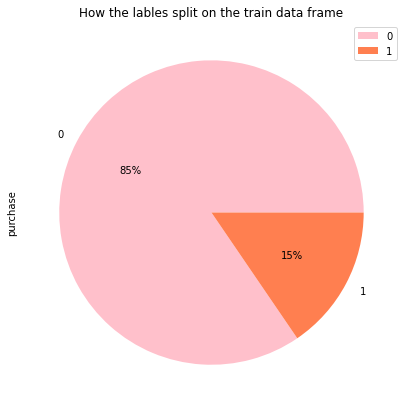

In [5]:
#we want to learn how many purchases were made VS not
print(data.groupby("purchase")['purchase'].count())
#results vizualisation 
data.groupby(['purchase']).count().plot(kind='pie',y = 0,autopct='%1.0f%%',colors = ['pink', 'coral'],title='How the lables split on the train data frame', ylabel='purchase', figsize=(7,7))
                                     

As we can see our train data is imbalanced, out of 10479 observations from the data, we found out that 85% of the sessions did not ended with a purchase while only 15% did.

*Related to what we learned in class, we believe that in order to prevent over-fittiing of our data to the train and generating closer to predicting the test well, we have to filter our observations.*

# Missing values

*let's explore our null values in the train data*

In [6]:
data.isnull().sum().sort_values()

id                           0
purchase                     0
Region                      19
BounceRates                 22
C                           23
B                           23
Weekend                     23
user_type                   23
Month                       25
ExitRates                   26
PageValues                  27
info_page_duration         317
device                     323
num_of_product_pages       403
admin_page_duration        413
closeness_to_holiday       496
internet_browser           563
num_of_admin_pages         605
product_page_duration      621
num_of_info_pages          687
A                          706
total_duration            4753
D                        10374
dtype: int64

From an initial look out of 10479 we have 10374 missing information at D column, we want to remove this column since it doesn't contribute to our research.

In [7]:
del data['D']

# Usefull functions

In [8]:
dict_info = {}
#for missing values
def fill_na_with_median(data, feature):
    feature_median = data[feature].median()
    data[feature] = data[feature].fillna(feature_median)
    dict_info[feature] = feature_median
def fill_na_with_mean(data, feature):
    feature_mean = data[feature].mean()
    data[feature] = data[feature].fillna(feature_mean)
    dict_info[feature] = feature_mean
def fill_na_with_most_freq(data, feature ):
    feature_most_freq = list(data[feature].mode())[0]
    data[feature] = data[feature].fillna(feature_most_freq)
    dict_info[feature] = feature_most_freq

**Let's see the 8 categorical attributes and which one we can change to numbers/floats.**

In [9]:
# Take data with TRUE or FALSE and make labels 1 or 0 accordingly
data['Weekend'].replace({True:1,False:0},inplace=True)

#Changing returning visitor to 1 and other or new visitor to 0
data['user_type'].replace({"Returning_Visitor":1,"New_Visitor":0, "Other":0},inplace=True)

In [10]:
#Getting categorial features of a data frame
def getting_categorial_features(data):
    all_Cols= data.columns
    numeric_cols= data.select_dtypes(include=[np.number]).columns
    noNum_cols =list(set(all_Cols)-set(numeric_cols))
    return noNum_cols

In [11]:
print(getting_categorial_features(data))

['A', 'internet_browser', 'C', 'product_page_duration', 'info_page_duration', 'Month']


Since we assume that visitors can only split to two categories, (returning visitor or new costumer), we can only assume that "other" means there is no defining data about those visitors- therefore we will assume that those observations were made also by new visitors.

As we saw before we can make the object features "product page duration" and "info page duration" to floats by removing the unnecessary strings.

In [12]:
# striping unneccery strings from the columns
def strip_Func(df, feature, word):
    df[feature] = df[feature].str.strip(word)
# changing types to float
def types_Func(df, feature):
    df[feature] = df[feature].astype(float)

In [13]:
strip_Func(data, 'product_page_duration', ' minutes')
strip_Func(data, 'info_page_duration', ' minutes')

types_Func(data, 'product_page_duration')
types_Func(data, 'user_type')
types_Func(data, 'info_page_duration')
print(data.dtypes)

id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration       float64
num_of_product_pages     float64
product_page_duration    float64
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                float64
Weekend                  float64
A                         object
B                        float64
C                         object
purchase                   int64
dtype: object


since the A is an anonymous column we want it's type to stay object for now...

# Features analysis

***Categorical Features distribution***

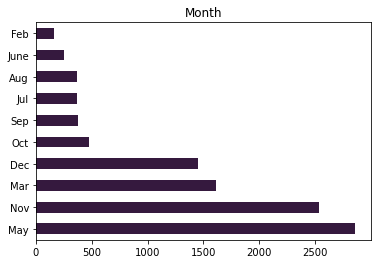

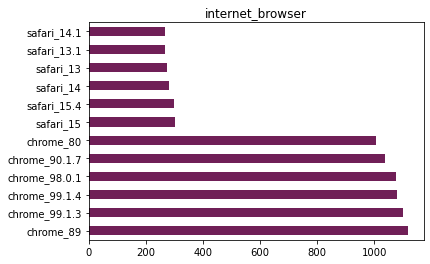

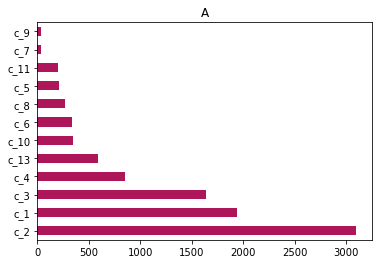

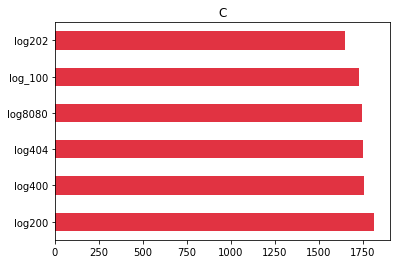

In [14]:
colors= sns.color_palette("rocket")
i = 0
for col in data.select_dtypes(include = [object]):
    data[col].value_counts().head(12).plot.barh(color = colors[i])
    i += 1
    plt.title(col)
    plt.show()

from this visualization, we found that distrabution of internet browser that is shown above represent only the 12 major browsers that were used. therefore we want to explore this feature and to see how many types of browsers there are.

In [15]:
print(data['internet_browser'].value_counts())
fill_na_with_most_freq(data,'internet_browser')

chrome_89         1117
chrome_99.1.3     1101
chrome_99.1.4     1080
chrome_98.0.1     1078
chrome_90.1.7     1038
                  ... 
browser_12_v16       1
browser_9_v13        1
browser_7_v13        1
browser_7_v18        1
browser_12_v12       1
Name: internet_browser, Length: 126, dtype: int64


There are 126 different browsers that were used in total in this data set. We want to split those browsers into less groups and make this a dummy feature. <br> 

In [16]:
data['internet_browser'] = data['internet_browser'].str.split('_', expand=True)[0]
data = pd.concat([data, pd.get_dummies(data['internet_browser'])], axis=1)
del data['internet_browser']

We also found the "month" feature interesting, therefore we would like to see the how many purchases were made in each month.

In [17]:
new_data = data[["Month", "purchase"]]
new_data = new_data[new_data['purchase'] != 0]
purchasebyMonth_train =new_data.groupby("Month")['Month'].count().sort_values()
print(purchasebyMonth_train)

Month
Feb       3
June     25
Jul      54
Aug      64
Sep      74
Oct      97
Mar     161
Dec     188
May     307
Nov     644
Name: Month, dtype: int64


***Vizualization - Purchase By Month***

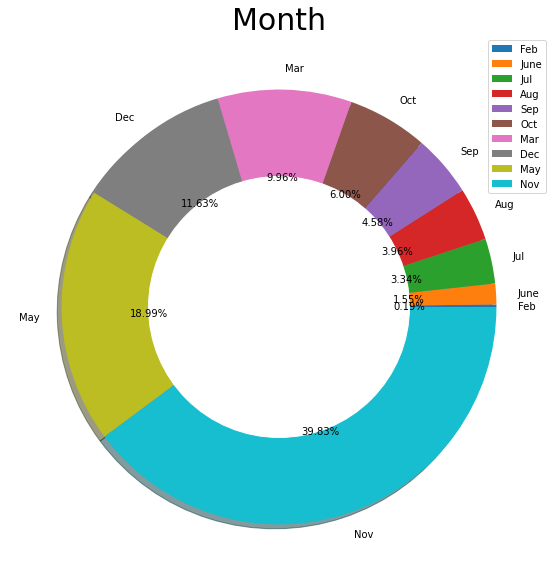

In [18]:
#Month labels by the sorted information above
month_labels = ["Feb" , "June", "Jul","Aug","Sep", "Oct", "Mar", "Dec", "May","Nov"] 
circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.rcParams['figure.figsize'] = (50, 10)
plt.pie(list(purchasebyMonth_train) ,labels = month_labels,shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

*Now let's see the difference between : Purchases by month and all sessions by month.*

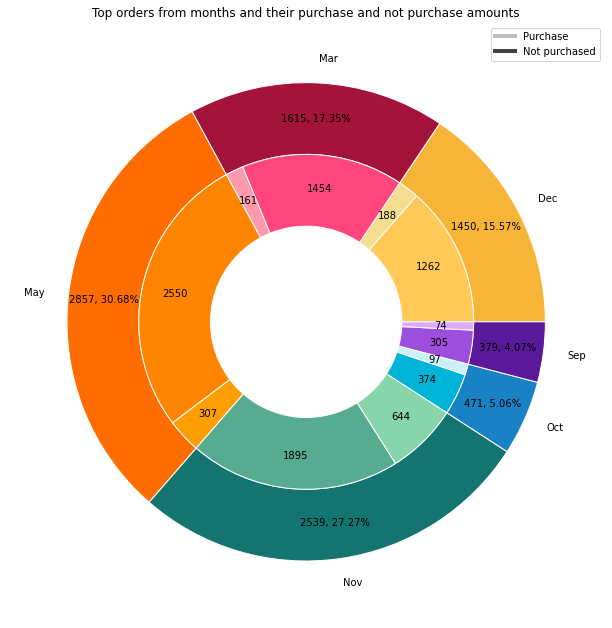

In [19]:
months = data['Month'].value_counts().to_frame().head(6)
months = months.index.tolist()
month_df = data[['Month', 'purchase']]
month_df = month_df.groupby(['Month', 'purchase']).agg({'Month':'first', 'purchase':'size'})
month_df = month_df[month_df['Month'].isin(months)]
month_df = month_df.rename(columns = {'Month' : 'month_name'})
month_df['sum_of_orders'] = month_df.groupby(['month_name']).transform('sum')
cancelled_uncancelled = list(month_df['purchase'])
total_orders = list(month_df['sum_of_orders'])[::2]
fig, ax = plt.subplots(figsize = (11, 11))
size = 0.3
def number_of_orders_with_percent(orders):
    # function(autopct in the ax.pie call) recieves percentage of pie(pct) from matplotlib, 
    # we calculate its value using the pct value provided and return it as a string
    # since autpct can recieve a callable, we return a function aswell
    return lambda x: f'{int(round(x * sum(orders) / 100))}, {round(x, 2)}%'
def number_of_orders(orders):
    return lambda x: f'{int(round(x * sum(orders) / 100))}'
ax.pie(month_df['sum_of_orders'][::2], radius=1,\
       colors = ['#f7b538', '#a4133c', '#ff6d00', '#14746f', '#1982c4', '#5a189a'], \
       wedgeprops = dict(width = size, edgecolor='w'), labels = ["Dec", "Mar", "May", "Nov", "Oct","Sep"], \
       autopct = number_of_orders_with_percent(cancelled_uncancelled), pctdistance = 0.85)
ax.pie(month_df['purchase'].ravel(), radius = 1 - size, wedgeprops=dict(width=size, edgecolor='w')
      , colors = ['#ffc857', '#f5dd90', '#ff477e', '#ff99ac', '#ff8500', '#ff9e00', '#56ab91'\
                 ,'#88d4ab', '#00b4d8', '#caf0f8', '#9d4edd', '#e0aaff'],\
                   autopct = number_of_orders(cancelled_uncancelled), pctdistance = 0.8)

legend_lines = [Line2D([0], [0], color = 'black', lw=4, alpha = 0.25),
               Line2D([0], [0], color = 'black', lw=4, alpha = 0.75)]
ax.set(title='Top orders from months and their purchase and not purchase amounts')
ax.legend(legend_lines, ['Purchase', 'Not purchased'])

**Numerical Features distrabution**

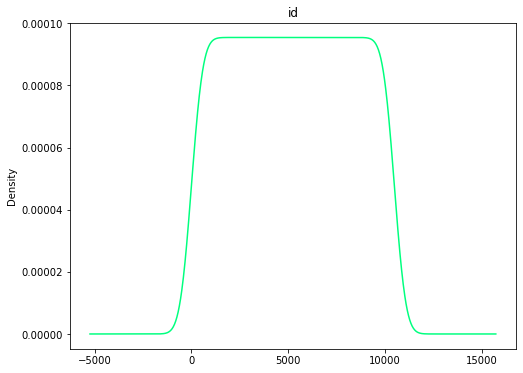

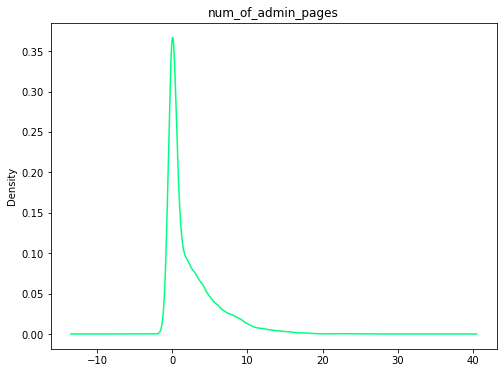

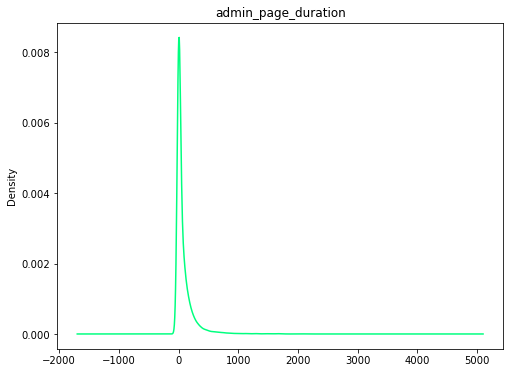

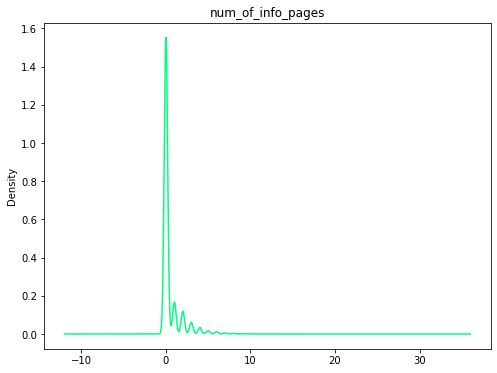

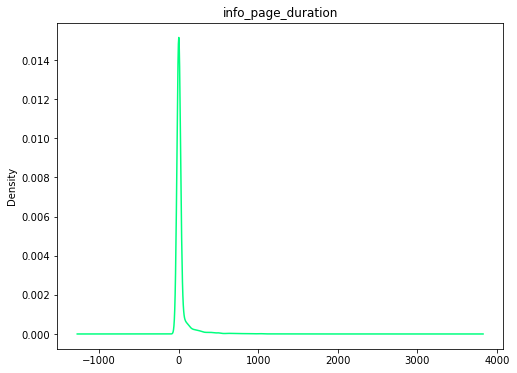

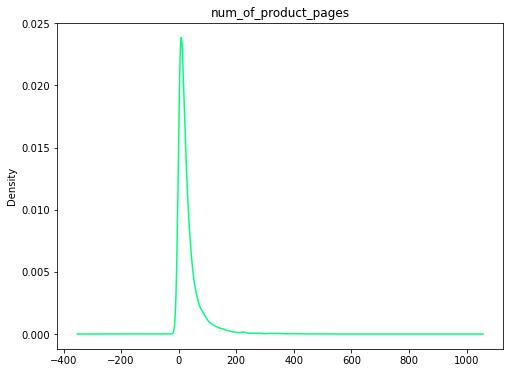

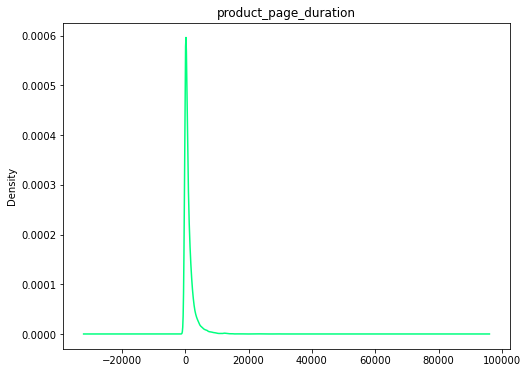

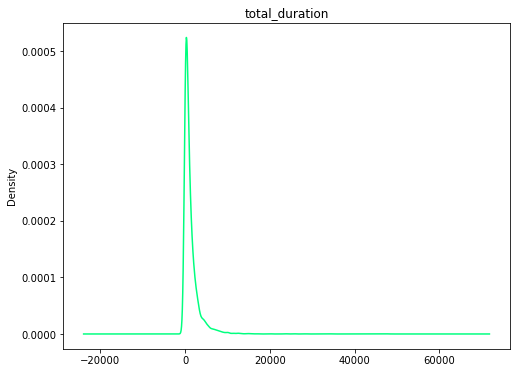

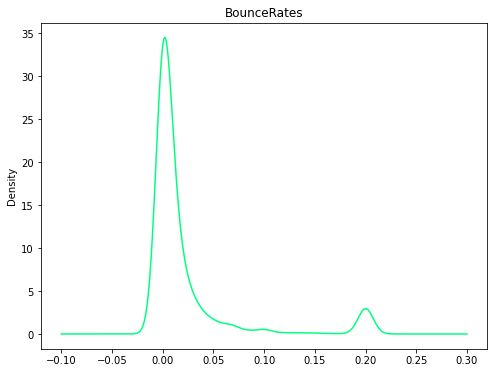

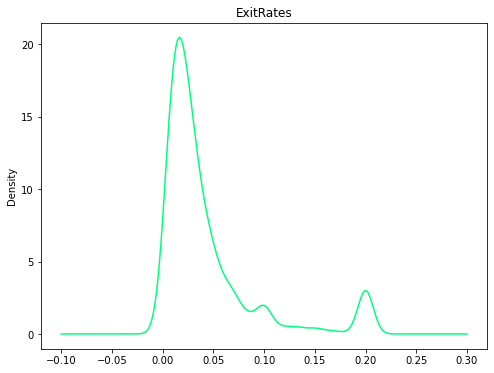

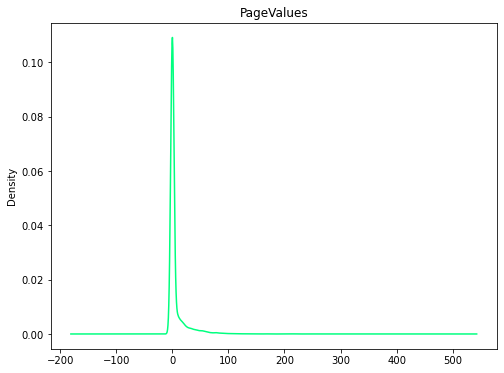

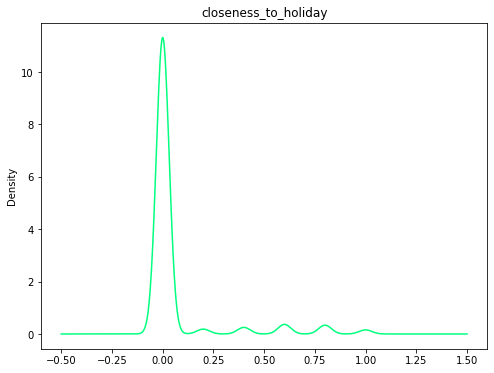

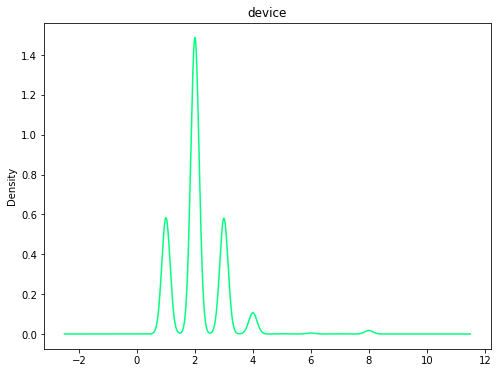

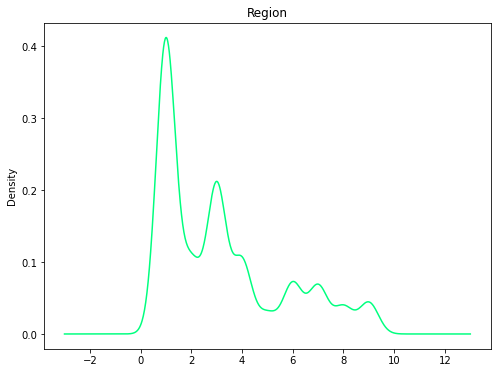

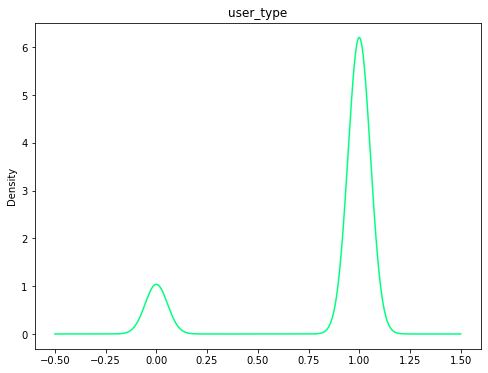

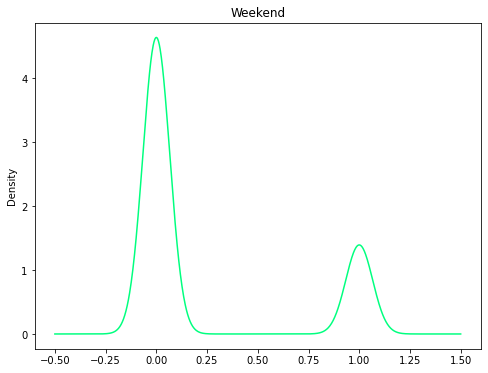

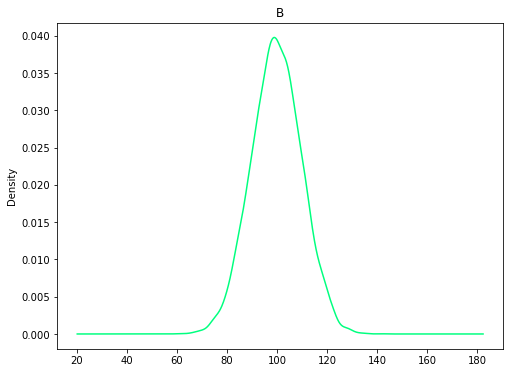

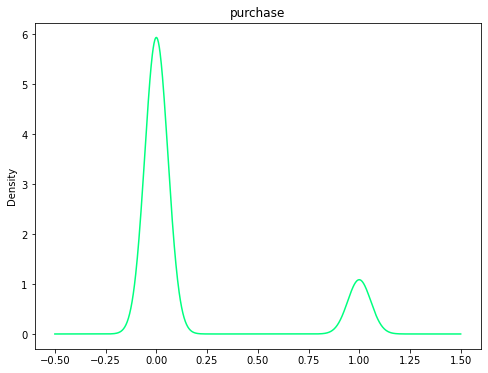

In [20]:
def numeric_features_density(df):
    column_numeric = df.select_dtypes(include = [float,int]).columns.tolist() 
    for col in column_numeric:
        plt.figure(figsize=(8,6))
        df[col].plot.density(color = 'springgreen')
        plt.title(col)
        plt.show()
numeric_features_density(data)

It seems like the "B" feature is normally distrןbuted. <br>
(It's clear that the "id" feature is normally distrabuted however it is not relevant since it is arbitrary)

We recognize that those following features: 
1. "info_page_duration"
2. "admin_page_duration"
3. "product_page_duration"<br>have a similar information about the sessions so we decided to merge them into one feature called "total_pageDuration"

And also these following features:
1. "num_of_info_pages"
2. "num_of_admin_pages"
3. "num_of_product_pages"<br>have a similar information about the sessions so we decided to merge them into one feature called "total_pageNumbers".

First we'll replace the null values with the median because their skewed distribution (as we saw before in our visualization):

In [21]:
#replacing Nan values to the median due to the skewed disrabution
median_lst = ['info_page_duration','admin_page_duration','product_page_duration','num_of_info_pages','num_of_admin_pages','num_of_product_pages']
for lst in median_lst:
    fill_na_with_median(data,lst)

#combining the features
data['total_pageDuration'] = data['product_page_duration']+data['info_page_duration']+data['admin_page_duration']
del data['product_page_duration'], data['info_page_duration'], data['admin_page_duration']
data['total_pageNumbers'] = data['num_of_product_pages']+data['num_of_info_pages']+data['num_of_admin_pages']
del data['num_of_admin_pages'], data['num_of_product_pages'], data['num_of_info_pages']

We want to emphasize the difference between the features "total duration" that describe the total duration of the session and the new feature "total page duration" that we created as a sum of the duration of the info, admin and product pages.
So we'll change the "total duration" column name to "total session duration" 

In [22]:
data.rename(columns={'total_duration':'total_session_duration'}, inplace= True)
print(data.shape)

(10479, 21)


Let's check how significant is the "weekend" feature, we would like to check how many sessions were made during the weekends and how many of them ended with a purchase. 

Sessions during the weekend: purchase
0    2014
1     424
Name: purchase, dtype: int64 
Sessions during the week: purchase
0    6844
1    1197
Name: purchase, dtype: int64


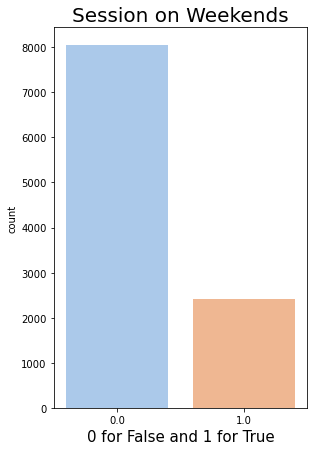

In [23]:
neww_data = data[["Weekend", "purchase"]]
yesWeekend_pur = neww_data[neww_data['Weekend'] != 0].groupby("purchase")['purchase'].count()
noWeekend_pur = neww_data[neww_data['Weekend'] == 0].groupby("purchase")['purchase'].count()
print("Sessions during the weekend:", yesWeekend_pur,'\n' "Sessions during the week:", noWeekend_pur)
plt.rcParams['figure.figsize'] = (10,7)
plt.subplot(1, 2, 2)
sns.countplot(x=data['Weekend'],palette = sns.color_palette("pastel"))
plt.title('Session on Weekends', fontsize = 20)
plt.xlabel('0 for False and 1 for True', fontsize = 15)
plt.show()

From the above information we see that the observations of the Weekend feature data is highly imbalanced.


Let's see the significance of the "User type" feature, how many users we have from any type and their choice...
("purchase = 0" : means the session didn't end with a purchase, and "purchase=1" means the session ended with a purchase.)

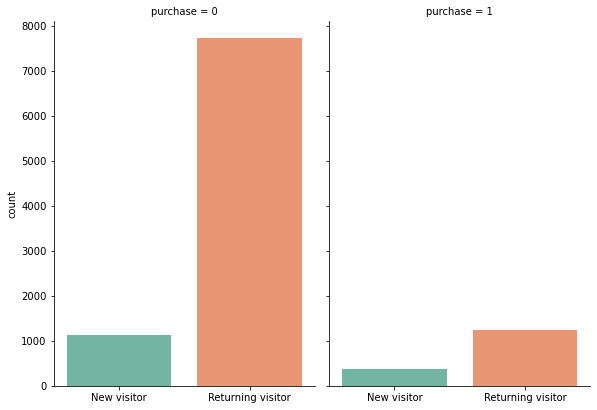

In [24]:
g = sns.catplot(x="user_type", col="purchase",
                data=data, kind="count",
                height=6, aspect=.7, palette="Set2");
g.set_axis_labels("", "count")
g.set_xticklabels(["New visitor", "Returning visitor"])

We can see that most of sessions in total and those who ended with a purchase were made by returning visitors.

We want to show the correlation between the features: (most important the numerical ones...)

In [25]:
def corr_features_check(df):
    corr = df.corr(method = 'pearson').abs()
    return corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

corr_features_check(data)

,id,total_session_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,user_type,Weekend,B,purchase,browser,chrome,edge,safari,total_pageDuration,total_pageNumbers
id,1.00,0.15,0.05,0.08,0.05,0.23,0.04,0.01,0.08,0.02,0.02,0.12,0.01,0.02,0.04,0.00,0.14,0.17
total_session_duration,0.15,1.00,0.19,0.27,0.05,0.05,0.01,0.05,0.11,0.00,0.03,0.15,0.04,0.08,0.01,0.06,0.98,0.87
BounceRates,0.05,0.19,1.00,0.91,0.12,0.08,0.02,0.01,0.13,0.04,0.01,0.15,0.00,0.02,0.02,0.03,0.18,0.21
ExitRates,0.08,0.27,0.91,1.00,0.17,0.11,0.02,0.01,0.17,0.06,0.01,0.21,0.01,0.03,0.02,0.03,0.25,0.30
PageValues,0.05,0.05,0.12,0.17,1.00,0.06,0.02,0.01,0.12,0.01,0.01,0.49,0.02,0.02,0.01,0.00,0.06,0.06
closeness_to_holiday,0.23,0.05,0.08,0.11,0.06,1.00,0.02,0.01,0.09,0.02,0.01,0.08,0.02,0.02,0.00,0.03,0.05,0.03
device,0.04,0.01,0.02,0.02,0.02,0.02,1.00,0.08,0.03,0.00,0.00,0.02,0.08,0.30,0.03,0.40,0.00,0.00
Region,0.01,0.05,0.01,0.01,0.01,0.01,0.08,1.00,0.05,0.00,0.00,0.01,0.03,0.01,0.02,0.05,0.03,0.04
user_type,0.08,0.11,0.13,0.17,0.12,0.09,0.03,0.05,1.00,0.04,0.01,0.11,0.02,0.04,0.02,0.02,0.11,0.12
Weekend,0.02,0.00,0.04,0.06,0.01,0.02,0.00,0.00,0.04,1.00,0.00,0.03,0.00,0.03,0.04,0.05,0.01,0.02


According to the correlation map those features has a strong correlation:
* "total page duration" VS "total session duration"
* "total page duration" VS "total page numbers"
* "total page numbers" VS "total session duration"
* "BounceRates" VS "ExitRates"
* "ExitRates" VS "total page numbers"

In [26]:
#Let's see the exact correlation between those features -
print("total page duration and total session duration correlation:", data["total_pageDuration"].corr(data["total_session_duration"]))
print("total page duration and total page numbers correlation:",data['total_pageDuration'].corr(data['total_pageNumbers']))
print("total session duration and total page numbers correlation:", data['total_session_duration'].corr(data['total_pageNumbers']))
print("total bounce rates and exit rates correlation:",data['ExitRates'].corr(data['BounceRates']))
print("exit rates and total page numbers correlation:", data['ExitRates'].corr(data['total_pageNumbers']))

total page duration and total session duration correlation: 0.9775995988534029
total page duration and total page numbers correlation: 0.8232383591152437
total session duration and total page numbers correlation: 0.8725220807811717
total bounce rates and exit rates correlation: 0.911589235553702
exit rates and total page numbers correlation: -0.3001105409430249


We can see that there is almost 100% correlation between "total page duration" VS "total session duration" (~98%)
therefore we believe that the added value of one of the features is not necessary as it will help us removing 1 dimension of the data.
We also noticed that the correlation between "total page duration" VS "total page numbers" is lower than the correlation between "total page numbers" VS "total session duration".<br>Moreover, we saw that the feature "total session duration" has over 4500 missing values (in our missing values part). while all the features combining "total duration" has just around 1300 missing values.

Therefore it will be more beneficial to remove the feature with the higher correlation and more missing values.

In [27]:
del data['total_session_duration']

# ***MISSING VALUES continuation***

The imputation method should be decided after considering the distribution of data: which is represented above..

We can see that the A column has one of the biggest amount of missing values, and it is also anonymous categorial attribute, so we chose to delete this feature.

In [28]:
del data['A']

For the missing values within the features "Bounce rates" , "exit rates" and "page values" (which represents similar data information), we saw that they were right-skewed so we thought that the right way to fill the missing values is with the median values of each feature.

In [29]:
fill_na_with_median(data,'ExitRates')
fill_na_with_median(data,'BounceRates')
fill_na_with_median(data,'PageValues')

We saw before in our visualization that the B feature normally-distributed therefore it is correclty as we learned to use the mean to fill in the missing.

In [30]:
fill_na_with_mean(data,'B')
fill_na_with_mean(data,'closeness_to_holiday')

The anonymouce feature C only has 16 rows with missing values out of 10460 observations left, it's clear that the missing value count is not large enough from the dataset then the rows can be dropped.

In [31]:
data['C'] = data['C'].fillna('a')
data = data.loc[(data['C'] !='a')]

For the missing values with the features user type and weekend (which both are boolean features), so we thought that the right way to fill the missing values is with the median values of each feature.

In [32]:
fill_na_with_median(data,'user_type')
fill_na_with_median(data,'Weekend')

As we've mentioned the "month", "device" and "region" features are representing categorial information. Therefore we will fill the null values with the most frequent value.

In [33]:
fill_na_with_most_freq(data,'Month')
fill_na_with_most_freq(data,'device')
fill_na_with_most_freq(data,'Region')

In [34]:
train_data_no_catergory = data.copy()
categorial_features = ['C','Region','Month','device','browser','chrome','edge','safari']
for col in categorial_features:
     del train_data_no_catergory[col]

Since we can see we have a lot of goups that has small amount of observations' we wanted to combine the groups with the groups that has 10% or less out of the observations to one group called "other" (for Region). And for "device" the groups that has 1% or lower.

In [35]:
print(data['device'].value_counts())
print(data['Region'].value_counts())

2.0    5735
1.0    2126
3.0    2119
4.0     387
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64
1.0    4062
3.0    2041
4.0     995
2.0     937
6.0     694
7.0     655
9.0     431
8.0     368
5.0     273
Name: Region, dtype: int64


In [36]:
#Combinig groups with low values
def comb_Lowvalues(data, feature):
    saved_values_for_reducing = {}
    x = list(data[feature].value_counts().index)
    y = list(data[feature].value_counts())
    lst = []
    for j in range(0, len(x)):
        if (feature == 'device'):
            if (y[j] / sum(y)) <= 0.01:
                lst.append(x[j])
        elif (feature == 'Region'):
            if (y[j] / sum(y)) <= 0.1:
                lst.append(x[j])
    for k in lst:
        data[feature] = data[feature].replace(k, 'other')
        saved_values_for_reducing[feature] = list(data[feature].value_counts().index)
        saved_values_for_reducing[feature].remove('other')

In [37]:
comb_Lowvalues(data, 'device')
comb_Lowvalues(data, 'Region')
#Saving the combined groups for the test data
other_device_lst = [8.0,6.0,5.0,7.0]
other_region_lst = [4.0,2.0,6.0,7.0,9.0,8.0,5.0]

**Making dummy variables from the categorials attributes:**

In [38]:
data['Region'] = 'Region_' + data['Region'].astype(str)
data['device'] = 'device_' + data['device'].astype(str)
categorial_features = ['C','Region','Month','device']
for col in categorial_features:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)
    del data[col]
categorial_features.append('internet_browser') #for later when using to clean the test

**Dealing with "D" by using KNN imputer**

In [39]:
#KNN imputer for the train with the train info 
#imputer_1 = KNNImputer(n_neighbors=5, weights='distance')
#copy without the label
#train_nolabel = data.drop(columns="purchase")
#label_train = data["purchase"]
#imputer_test = pd.DataFrame(imputer_1.fit_transform(train_nolabel, y=label_train), columns= train_nolabel.columns)

#Using the KNN imputer for test
#imputer_test_1 = KNNImputer(n_neighbors=5, weights='distance')
#imputer_test_1 = imputer_test_1.fit(train_nolabel)

#imputer_toimpute = pd.DataFrame(imputer_test_1.transform(test), columns= test.columns)
print(data.isnull().sum().sort_values())

id                      0
Region_1.0              0
Region_3.0              0
Region_other            0
Aug                     0
Dec                     0
Feb                     0
Jul                     0
log_100                 0
June                    0
May                     0
Nov                     0
Oct                     0
Sep                     0
device_1.0              0
device_2.0              0
device_3.0              0
Mar                     0
device_4.0              0
log8080                 0
log400                  0
BounceRates             0
ExitRates               0
PageValues              0
closeness_to_holiday    0
user_type               0
Weekend                 0
B                       0
log404                  0
purchase                0
chrome                  0
edge                    0
safari                  0
total_pageDuration      0
total_pageNumbers       0
log200                  0
log202                  0
browser                 0
device_other

# Outliers -
**Boxplot visualization**

Finding outliers from our data using boxplots

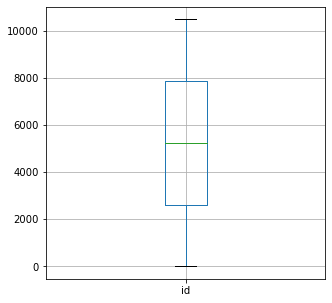

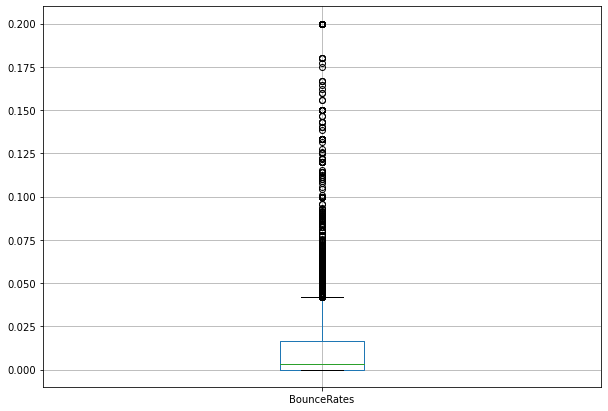

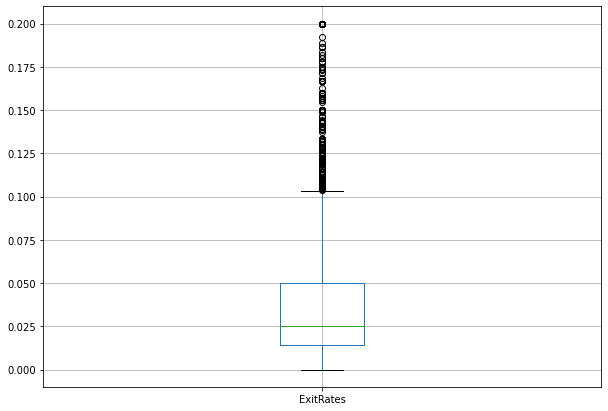

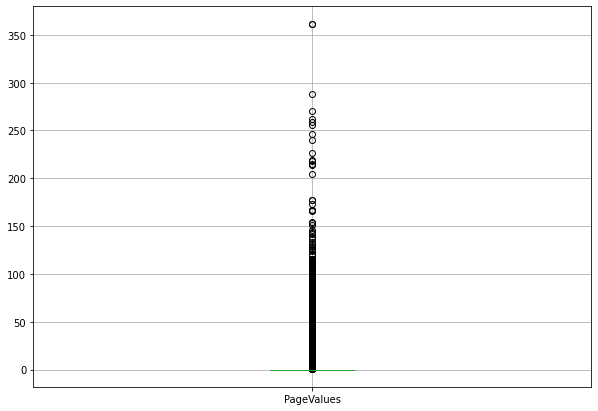

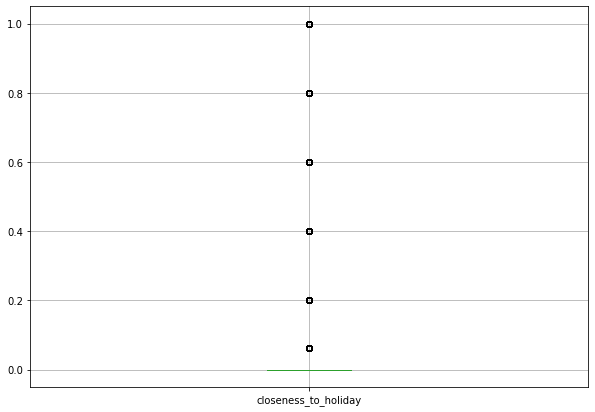

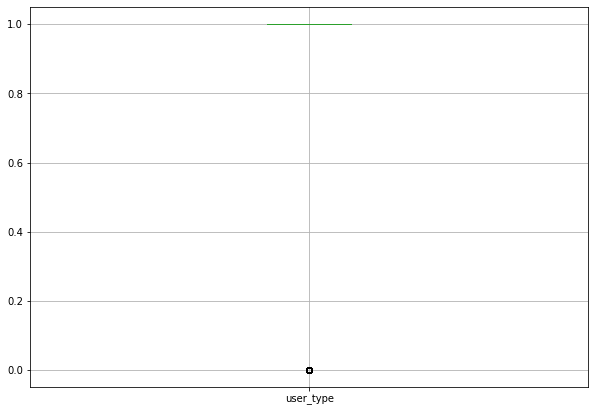

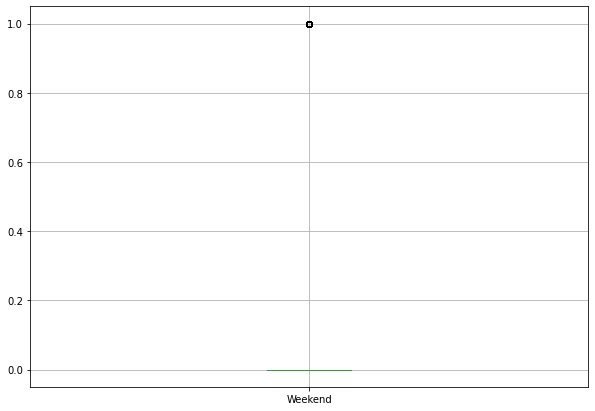

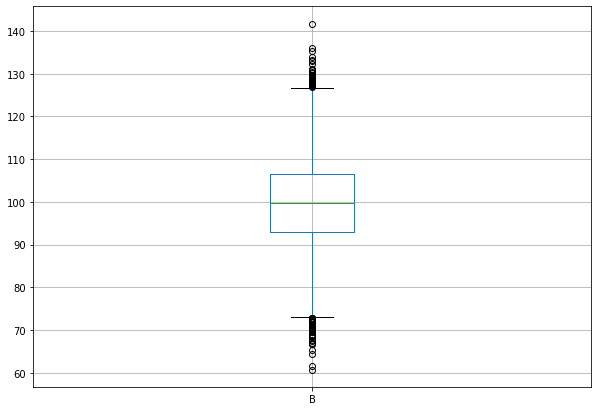

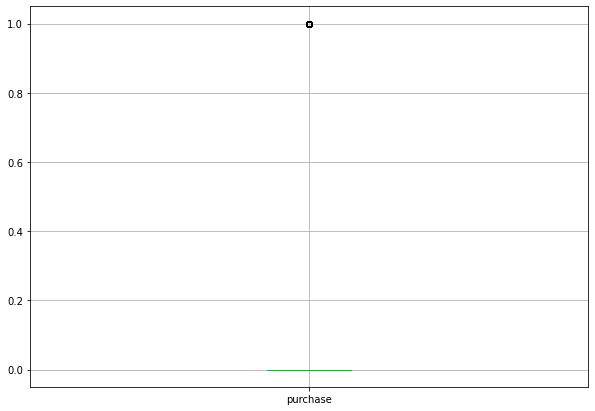

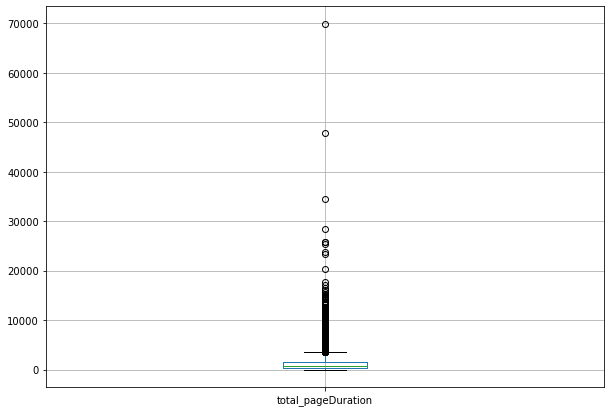

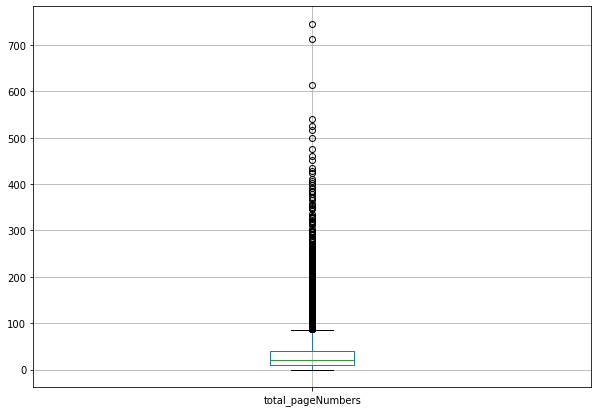

In [40]:
#lets use some boxplots, we want to see outliers of our features.
plt.figure(figsize=(5,5))
dataNumeric = data.select_dtypes(include = [float,int]).columns.tolist() 
for col in dataNumeric:
    data[[col]].boxplot()
    plt.show()



*Conclusions:* <br>
We can see from this visualization, that only these features has outlirs that need handeling: "Bounce rates", "Exit rates", "Page values", "B","C","total page duration" and "total page numbers".
The rest of the features don't have outliers beacuse some of them are categorial features who represted in a numerical form (id and user type), and some of them are boolean (weekend and purchase). "Closenes to holiday" is a numerical feature however it represents a scale between 0-1 of the days away from the holiday.  

***outliers functions***

In [41]:
#Fits only for normal distabution
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
#removing max outliers
def remove_outliersLmax(df):
    q3=df.quantile(0.999)
    no_outliers = df[((df<(q3)))]
    return no_outliers
def remove_outliersHmax(df):
    q3=df.quantile(0.995)
    no_outliers = df[((df<(q3)))]
    return no_outliers

In [42]:
#handaling for B
newdata =data['B']
outliers = find_outliers_IQR(newdata)
ans = list(outliers.index)
data['B'] = data['B'].drop(labels=ans, axis=0)
fill_na_with_mean(data,'B')

In [43]:
#handaling outlier with higher rate (0.995%)-
highCol = ['BounceRates','ExitRates','PageValues']
for col in highCol:
    temp = remove_outliersHmax(data[col])
    data = data.loc[list(temp.index)]
#handaling outlier with lower rate (0.999%)-
lowCol = ['total_pageDuration','total_pageNumbers']
for col in lowCol:
    temp = remove_outliersLmax(data[col])
    data = data.loc[list(temp.index)]

In [44]:
Purtrain =data['purchase'].value_counts()
print(Purtrain)
lst = list(Purtrain)
print('Purchases out of the whole data',100.00 * (lst[0]/(lst[1]+lst[0])),'%')
print('Non purchases out of the whole data',100.00 * (lst[1]/(lst[1]+lst[0])),'%')

0    8178
1    1570
Name: purchase, dtype: int64
Purchases out of the whole data 83.89413212966763 %
Non purchases out of the whole data 16.10586787033238 %


We can see that now the data is more balanced with our label.

# Cleaning the test

In [45]:
#Whole pre prossing - cleaning the data
def pre_processing(test, other_device_lst, other_region_lst, dict_info, categorial_features):
    del test['A'] , test['total_duration'], test['D']
# Take data with TRUE or FALSE and make labels 1 or 0 accordingly
    test['Weekend'].replace({True:1,False:0},inplace=True)
#Changing returning visitor to 1 and other or new visitor to 0
    test['user_type'].replace({"Returning_Visitor":1,"New_Visitor":0, "Other":0},inplace=True)
# striping unneccery strings from the columns
    strip_Func(test, 'product_page_duration', 'minutes')
    strip_Func(test, 'info_page_duration', 'minutes')
# changing types to float
    types_Func(test, 'product_page_duration')
    types_Func(test, 'info_page_duration')
    types_Func(test, 'user_type')
#filling missing values
    for k,v in dict_info.items():
        test[k] = test[k].fillna(v)
#combining the features
    test['total_pageDuration'] = test['product_page_duration']+test['info_page_duration']+test['admin_page_duration']
    del test['product_page_duration'], test['info_page_duration'], test['admin_page_duration']
    test['total_pageNumbers'] = test['num_of_product_pages']+test['num_of_info_pages']+test['num_of_admin_pages']
    del test['num_of_admin_pages'], test['num_of_product_pages'], test['num_of_info_pages']
#Combinig groups with low values
    for col in other_device_lst:
        test['device'] = test['device'].replace(col, 'other')
    for col in other_region_lst:
        test['Region'] = test['Region'].replace(col, 'other')
#make dummy features for categorial features
    test['internet_browser'] = test['internet_browser'].str.split('_', expand=True)[0]
    test['internet_browser'] = test['internet_browser'].fillna('chrome')
    test['Region'] = 'Region_' + test['Region'].astype(str)
    test['device'] = 'device_' + test['device'].astype(str)
    for col in categorial_features:
        test = pd.concat([test, pd.get_dummies(test[col])], axis=1)
        del test[col]

    return test

# Normalization

In [46]:
# In order to know if the data is normalized, let's see some basic statisical data on our numerical varaibles 
data.describe()

,id,BounceRates,ExitRates,PageValues,closeness_to_holiday,user_type,Weekend,B,purchase,browser,...,Mar,May,Nov,Oct,Sep,device_1.0,device_2.0,device_3.0,device_4.0,device_other
count,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,...,9748.000000,9748.000000,9748.00000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000,9748.000000
mean,5266.028314,0.010824,0.032905,5.439338,0.061251,0.852072,0.234202,99.781309,0.161059,0.091301,...,0.153365,0.271953,0.24364,0.047087,0.037649,0.200041,0.555806,0.198400,0.038162,0.007591
std,3014.235715,0.019862,0.028537,14.567517,0.194140,0.355047,0.423521,9.716453,0.367604,0.288051,...,0.360357,0.444989,0.42930,0.211835,0.190355,0.400051,0.496901,0.398815,0.191596,0.086801
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.021443,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2669.750000,0.000000,0.013388,0.000000,0.000000,1.000000,0.000000,93.132420,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5278.500000,0.001704,0.024250,0.000000,0.000000,1.000000,0.000000,99.772758,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7869.250000,0.013043,0.042019,0.000000,0.000000,1.000000,0.000000,106.406768,0.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,10478.000000,0.161905,0.162500,111.262994,1.000000,1.000000,1.000000,126.545802,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, the data is not normalized. For most of our data the mean and std of our features is outside the 0 - 1 range, so it's not min-max scaled, and since none of our features have a mean of 0 and standard deviation of 1, it is not standardized.

*what is min max scalling and why it fits here?*
It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. Because of the different measurement units we have, it is important to apply a numerical range in which the minimum and maximum will be equivalent.

Later in our work we were asked to examine the importance of lowering dimensions and using methods learned in class such as PCA, so it is necessary to normalize the data to prevent influencing the calculation by the variance that is affected by different scales in the features. <br>also for models such as K-NN we would like to normalize the data.

So, we will see later on when we need to normalize the data , and will use these following functions:


In [47]:
#Method 1- Square Root Transformation
def sqrt_trans(x):
    x_norm = np.sqrt(x)
    ax = sns.displot(x_norm, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
    ax.fig.suptitle('Distribution after Squareroot transfomation', size = 20)

#Method 2- MinMaxScaler
def data_normalization_minmax(df, df_test = None):
    normalized = df.copy()        
    min_max_scaler = MinMaxScaler()
    scaler = min_max_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(df_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data,columns=normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data
#Method 3- z-scores
def data_normalization_standard(df, df_test = None):
    normalized = df.copy()
    standard_scaler = StandardScaler()
    scaler = standard_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(normalized_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data, columns = normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data

None


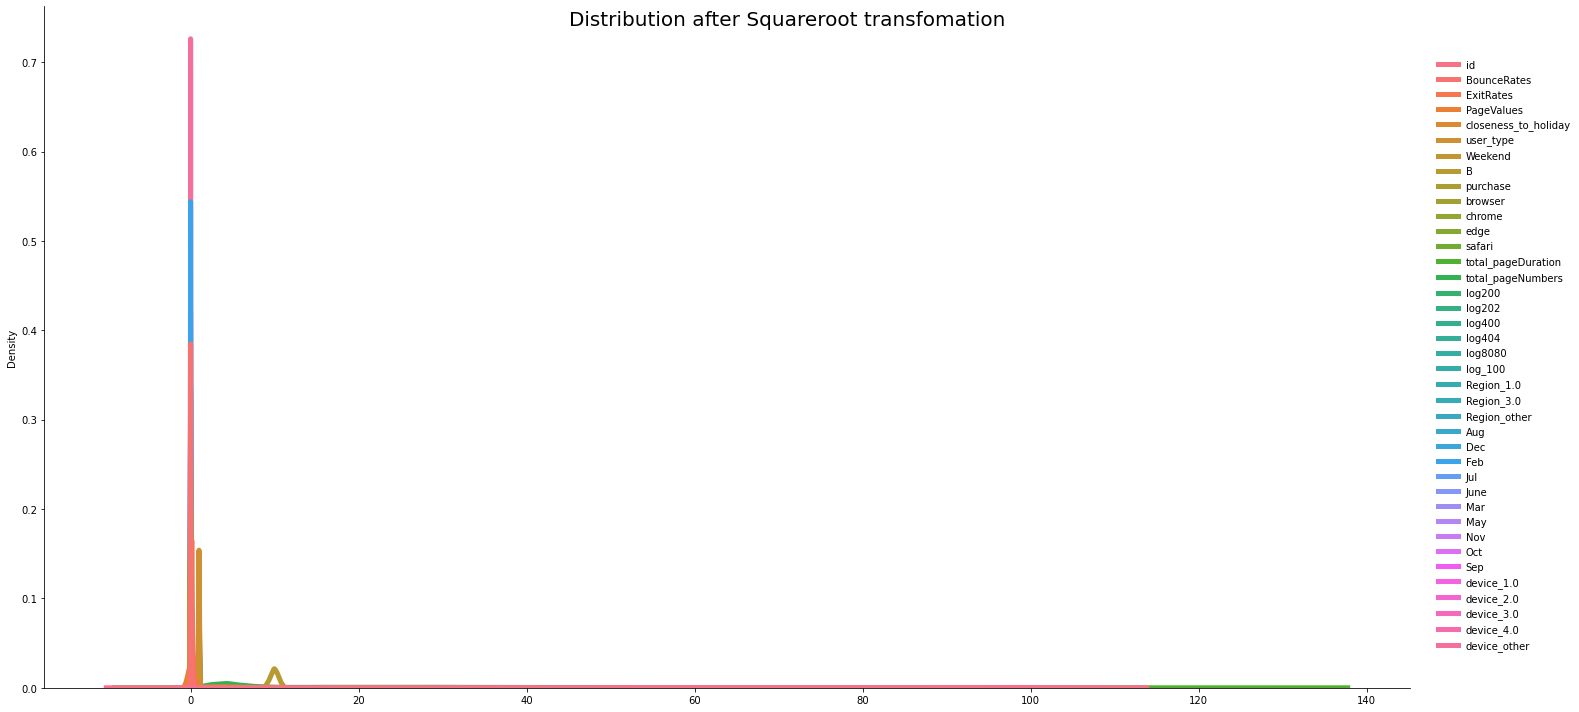

In [48]:
print(sqrt_trans(data))

In [49]:
data_no_label = data.loc[:, list(data.columns[0:8]) + list(data.columns[9:])]
y = data.values[:,8]
#Normalizing the data by minmax method
data_minmax = data_normalization_minmax(data_no_label)
X_norm = data_minmax.iloc[:,:]

In [50]:
#Normalizing the data by standard nomalization (z-score) method
data_norm_standard = data_normalization_standard(data_no_label)
X_Stn = data_norm_standard.iloc[:,:]

# **Dimensionality reduction**

The dimensionality of the data is too large.
Let's perform forward selection on the scaled data to reduce dimensionality.

In [51]:
#Helpful functions for reducing dimenstions used in our homeworks
def get_sigma_hat_squared(X,y):
    """
    Returns sigma_hat squared - an estimate of the noise variance sigma
    X: 2d np.array with the data.
    y: labels
    return: float - the sigma hat squared.
    """
    shirs_linear_reg = LinearRegression()
    shirs_linear_reg.fit(X,y)
    shirs_RSS = np.sum(np.square(y-(shirs_linear_reg.predict(X))))
    n = X.shape[0]
    d = X.shape[1]
    return (shirs_RSS/(n-d-1))

def get_mallows_cp_score(X,y,sigma_hat_squared):
    """
    Returns mallow cp score for given data, selected features and train model.
    X: 2d numpy array of data with only selected features
    y: 1d numpy array of labels (also knows as target values)
    sigma_hat_squared: the estimate for noise variance
    """
    shirs_linear_reg = LinearRegression()
    shirs_linear_reg.fit(X,y)
    n = X.shape[0]
    d = X.shape[1]
    mse = (np.linalg.norm(y-shirs_linear_reg.predict(X))**2)/len(y)
    return (mse+(2*(((d+1)/n))*sigma_hat_squared))

def add_feature(X,y,current_features, sigma_hat_squared):
    """
    Returns dictionary with list of features including chosen feature to include and the score with selected feature
    X: 2d np array with all the features.
    y: 1d np array with the labels
    current_features: list of indexes which represent the features which are already included
    sigma_hat_squared: the estimate for noise variance
    returns: A dictionary with 2 keys:
            'features': a sorted list of indexes containing the features of the best model (with the additional feature) -> current_features + [added feature]
            'score': the mallows cp score of that model
    """
    dict = {}
    best_features_lst = {}
    best_score = 9999999999
    d=X.shape[1]
    for x in range(d):
        afeature= current_features[:]
        if x not in afeature:
            afeature.append(x)
            temp = X[:,afeature]
            shir_cp = get_mallows_cp_score(temp,y,sigma_hat_squared)
            dict[shir_cp]= afeature
    
    best_score = min(dict)
    best_features_lst = dict[best_score]
    return {'features':sorted(best_features_lst),'score':best_score}  

def forward_selection(X, y):
    """
    returns list of indexes for the selected features
    X: 2d numpy array with original training data
    y: numpy vector with targets of training data
    returns: a sorted list containing the indexes of the selected features
    """
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

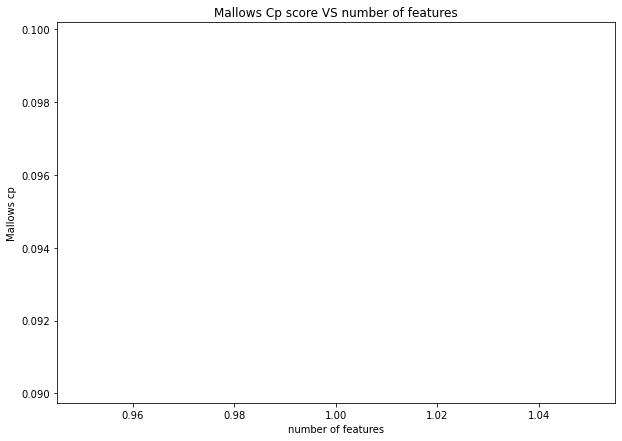

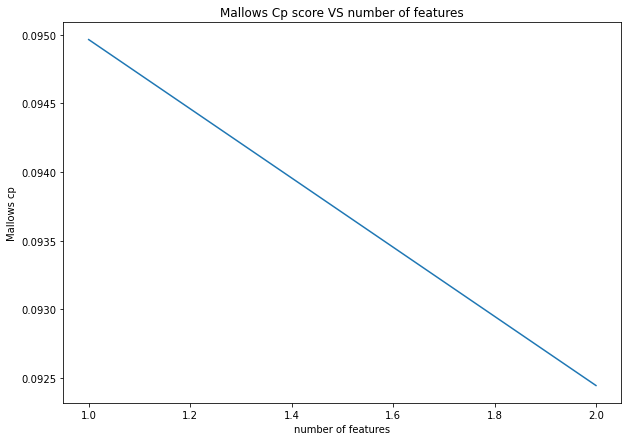

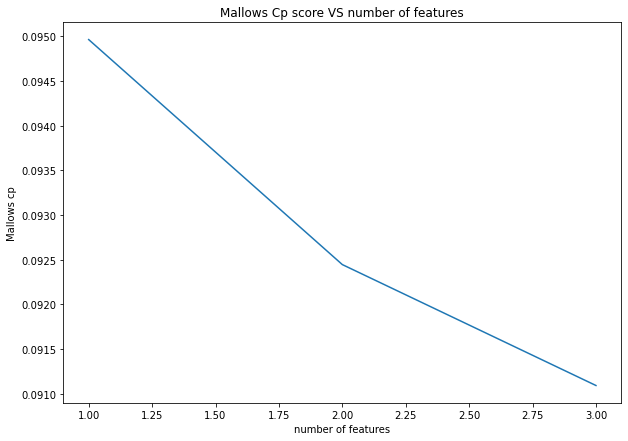

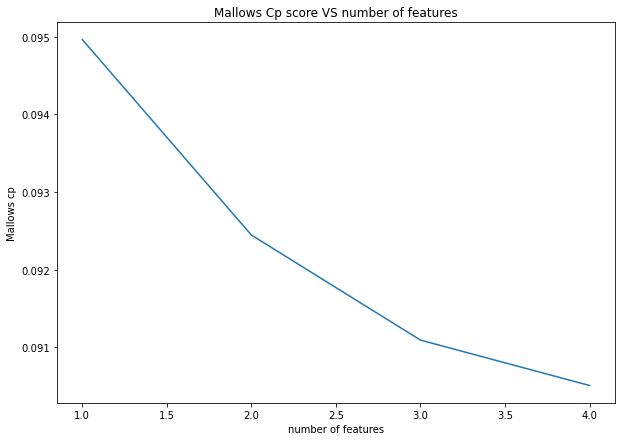

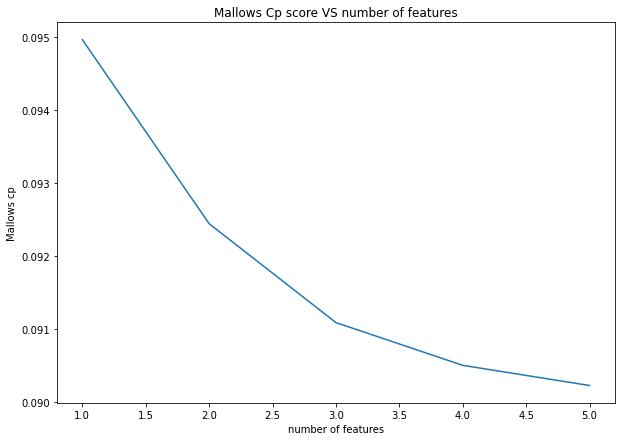

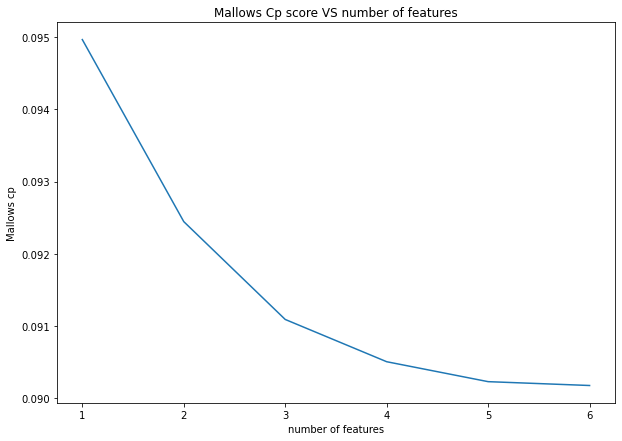

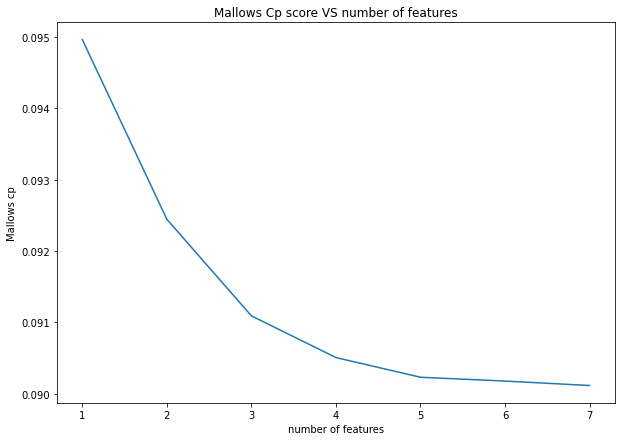

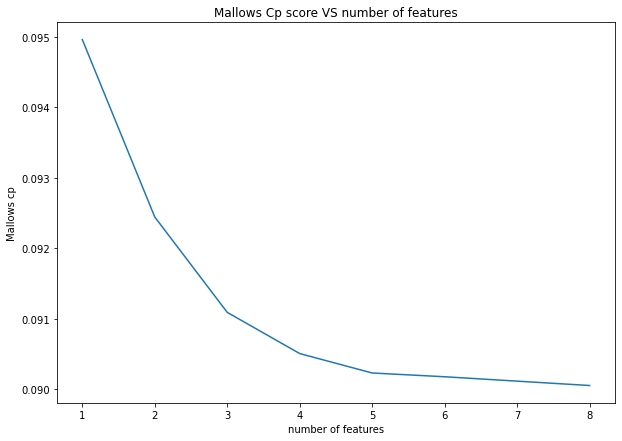

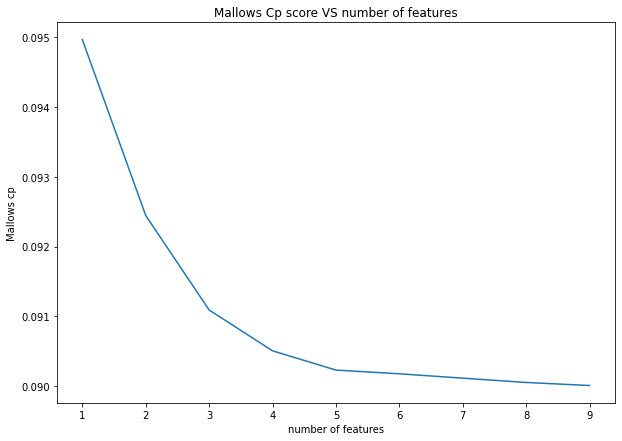

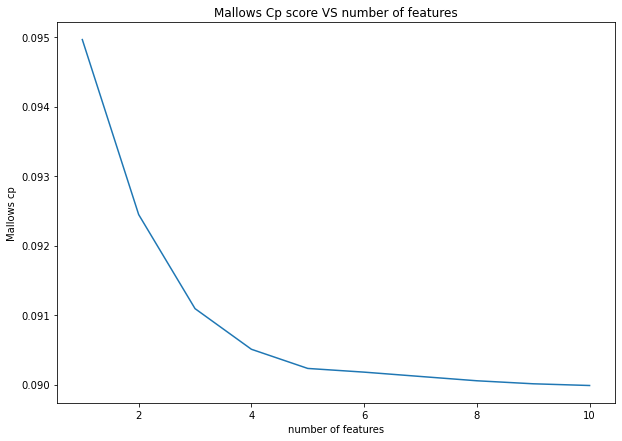

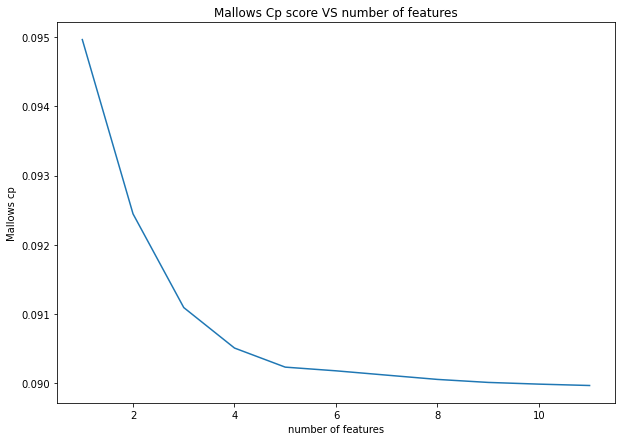

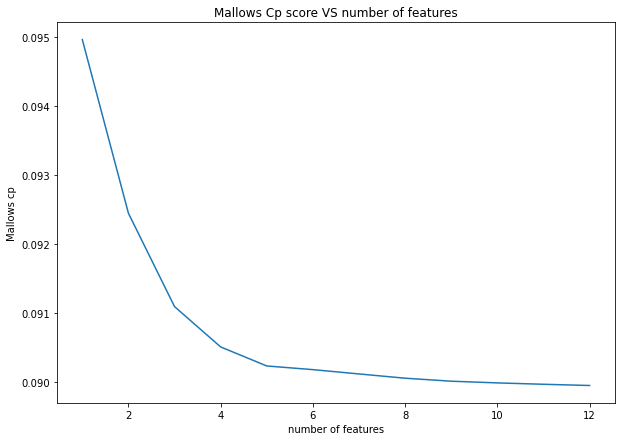

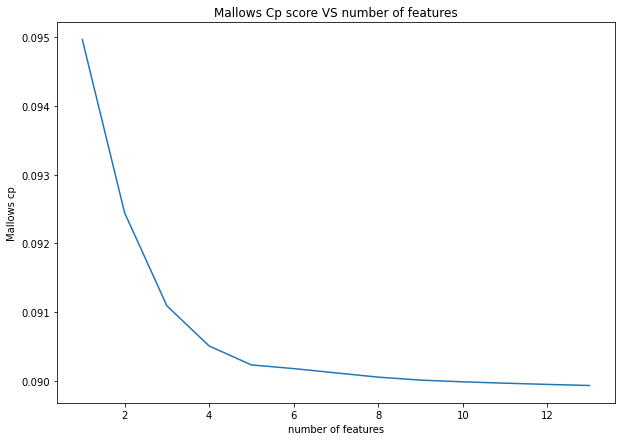

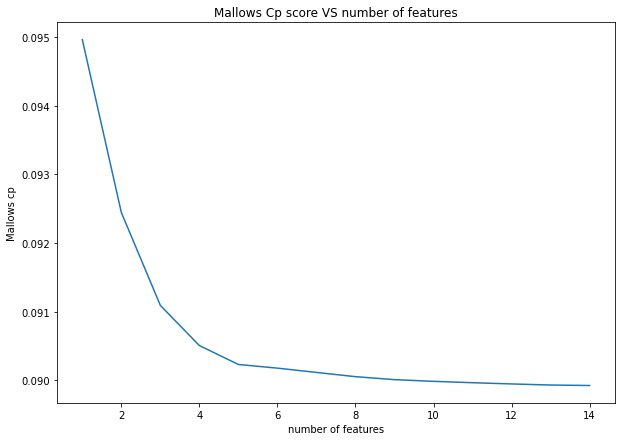

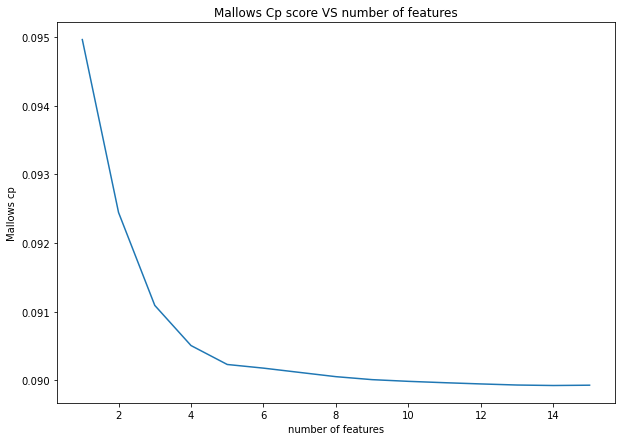

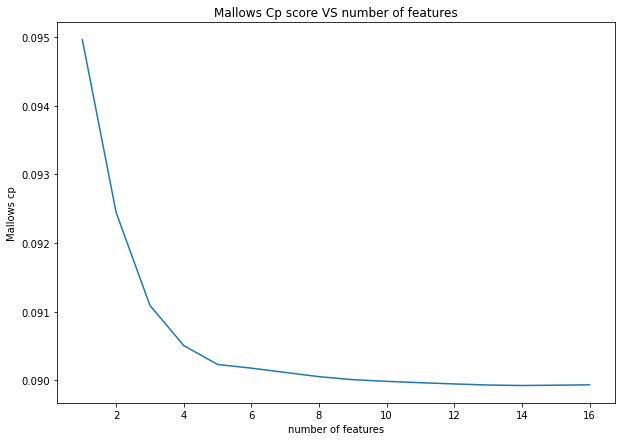

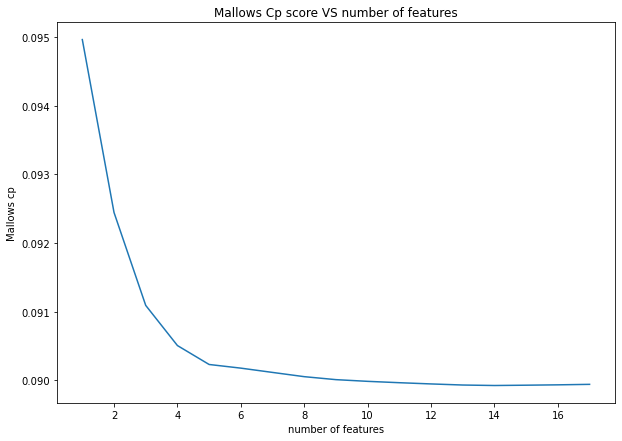

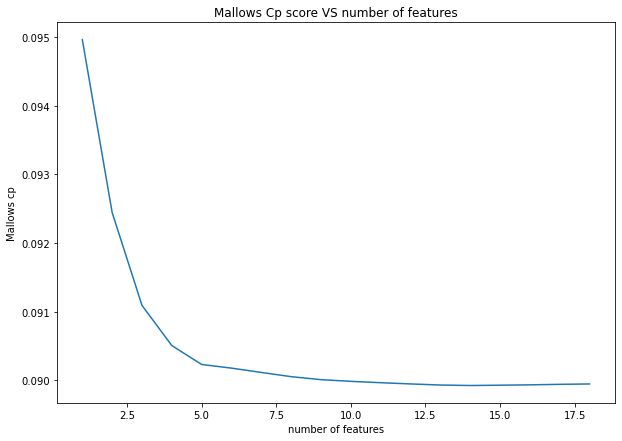

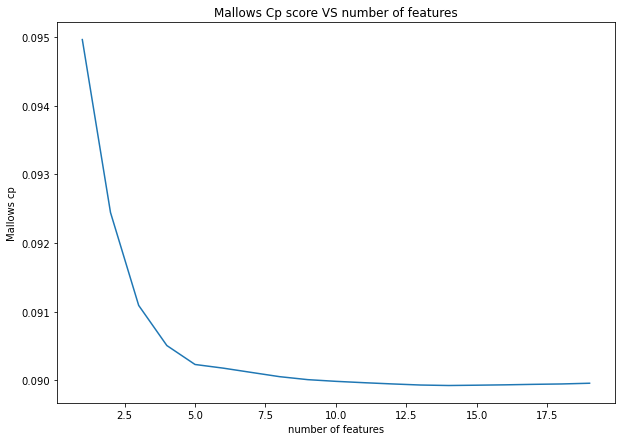

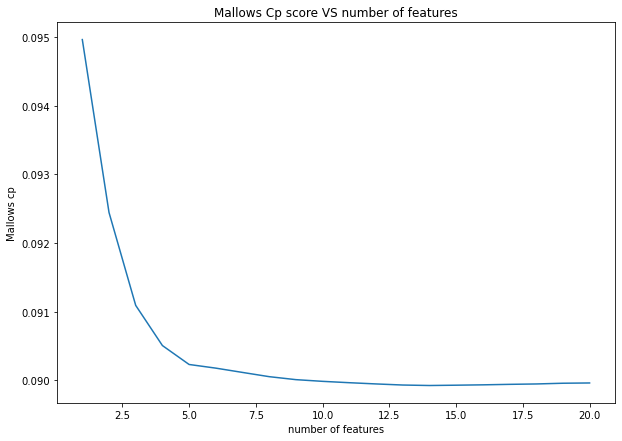

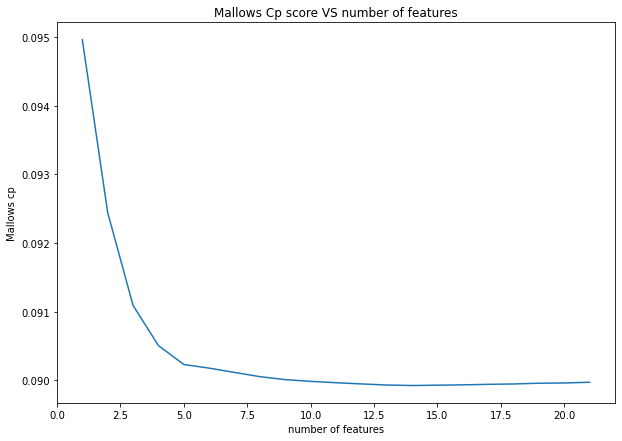

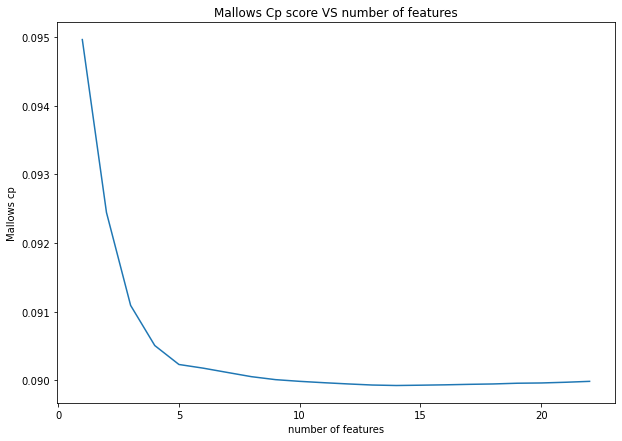

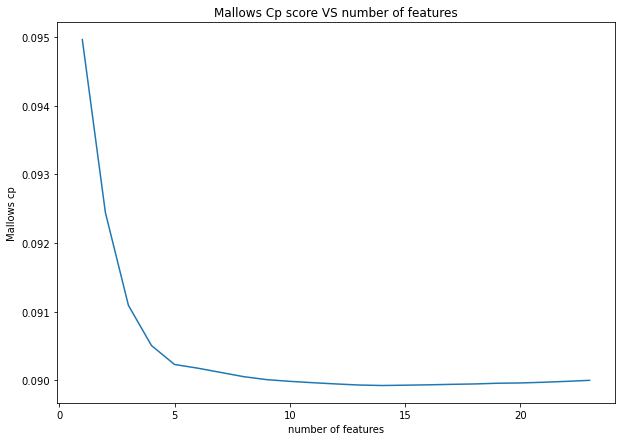

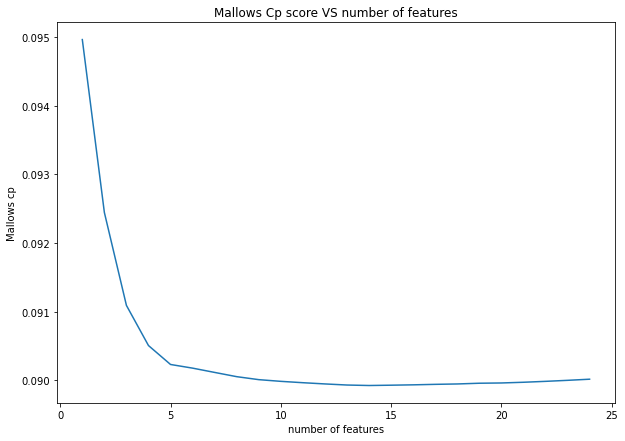

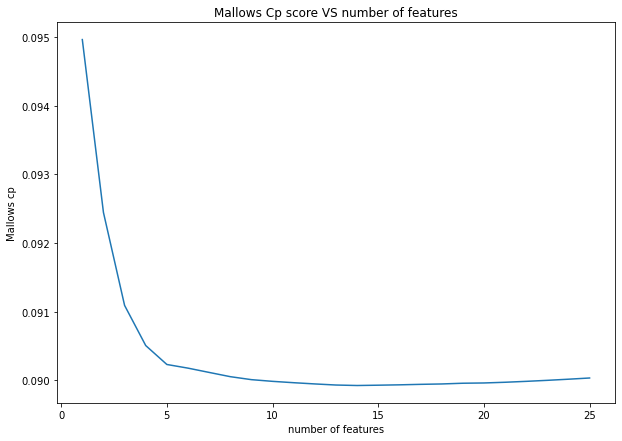

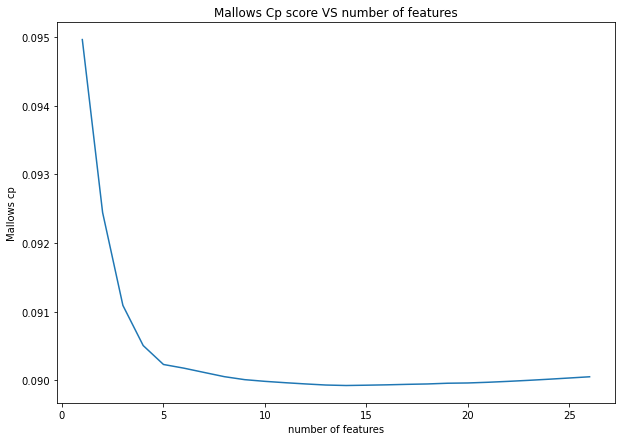

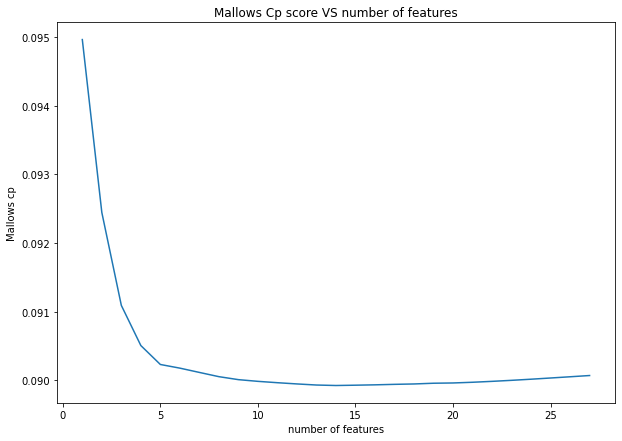

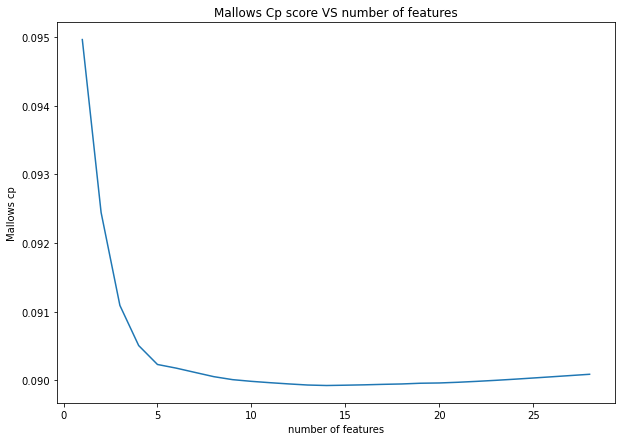

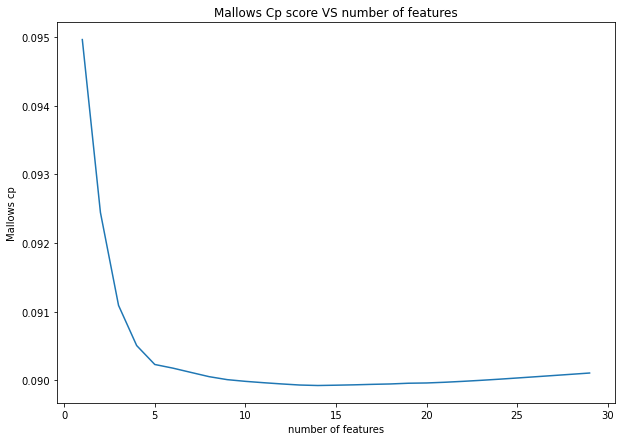

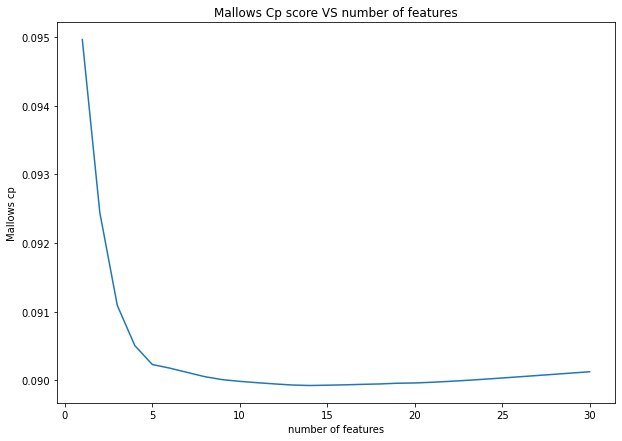

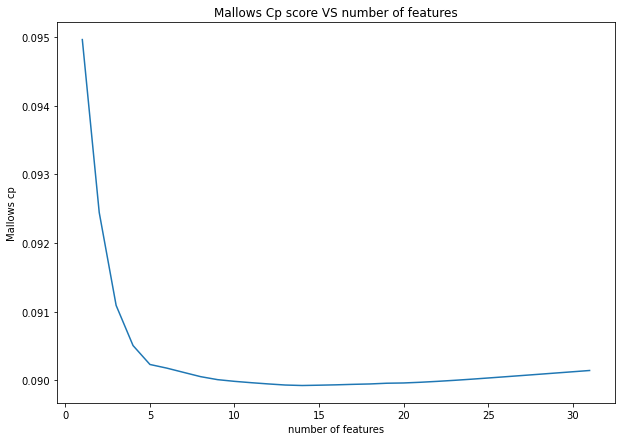

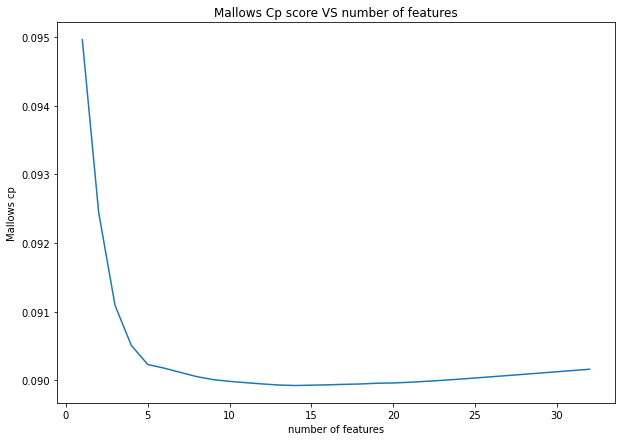

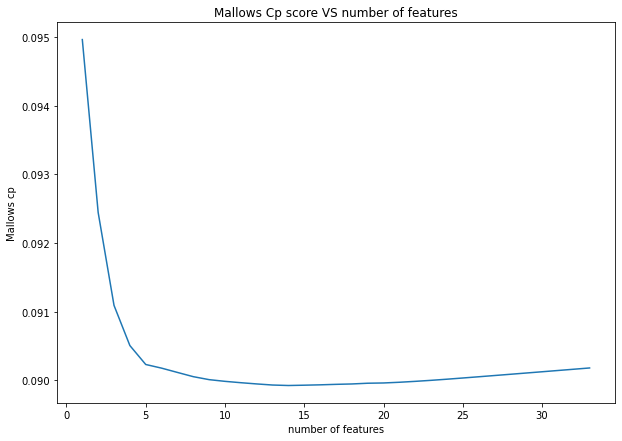

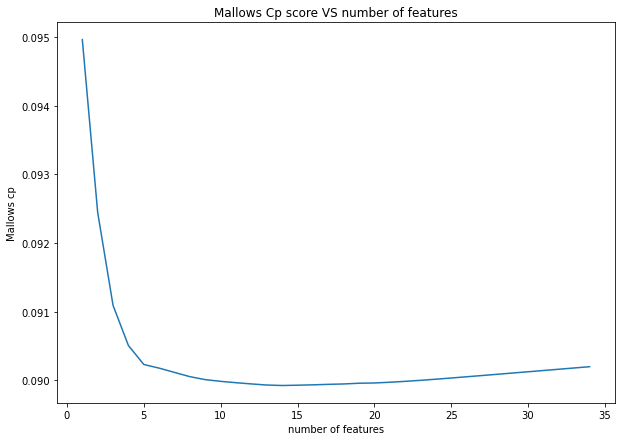

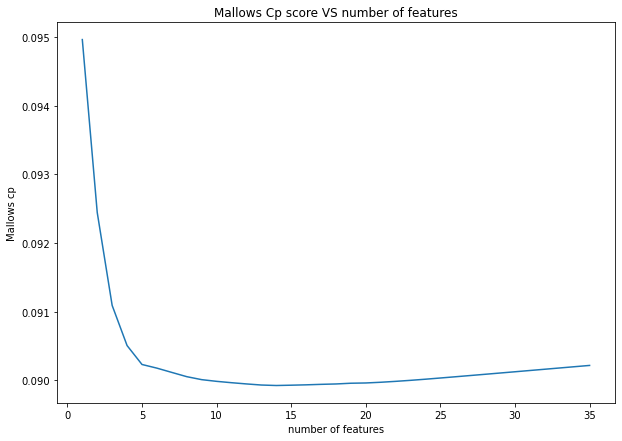

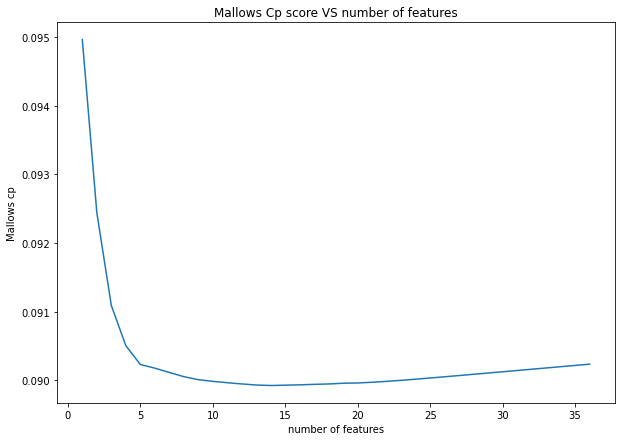

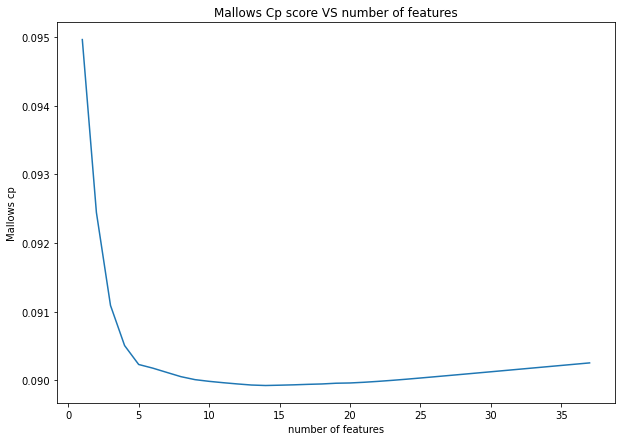

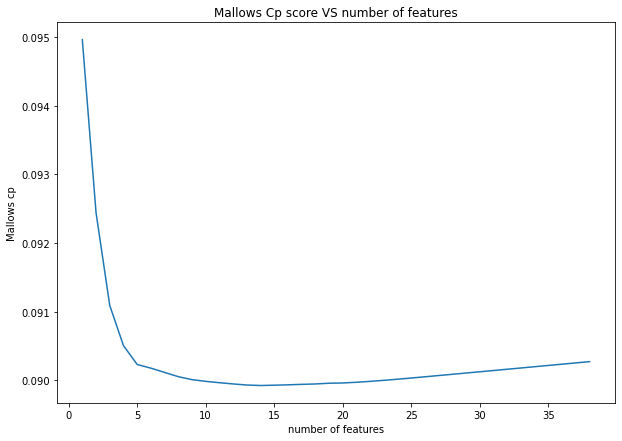

number of selected features by forward: 14


In [52]:
#Raw data
curX = data_no_label.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_raw_new = data_no_label.iloc[:, res_log_reg]

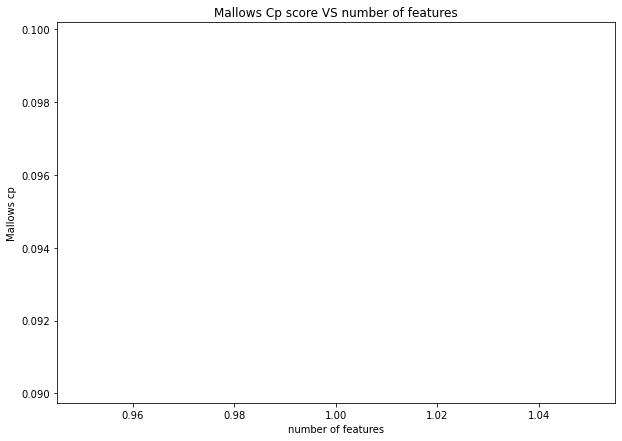

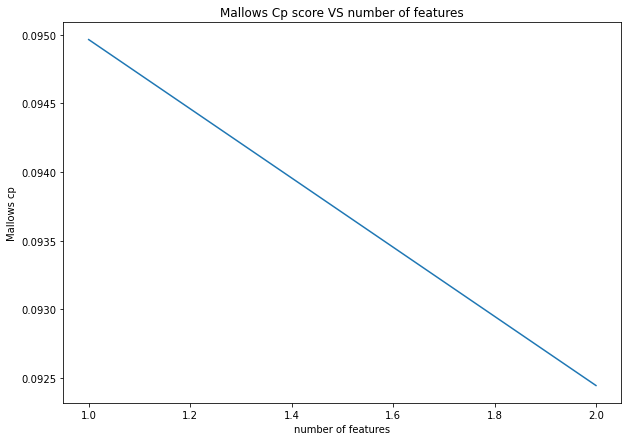

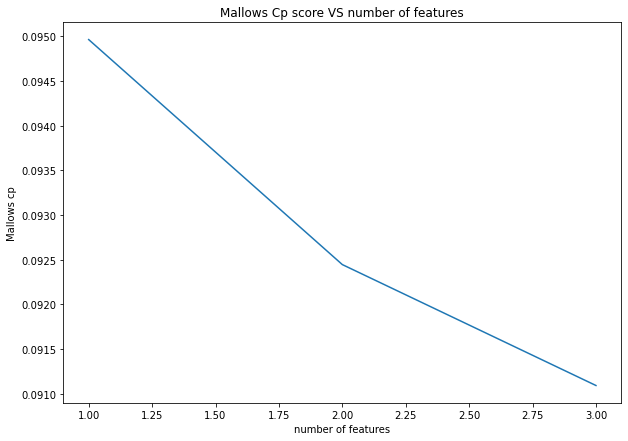

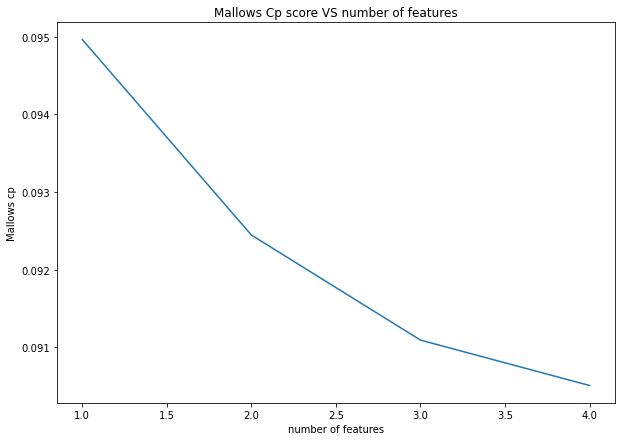

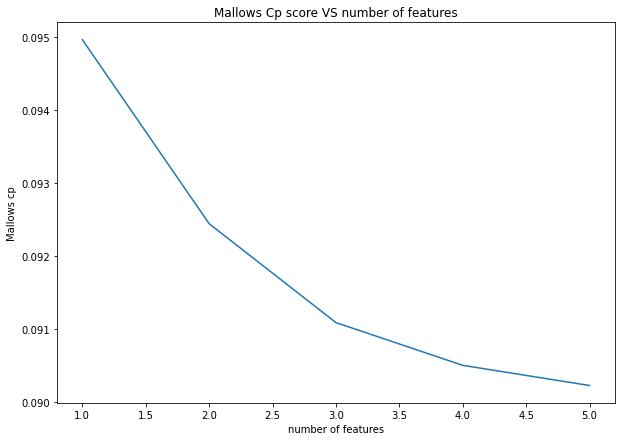

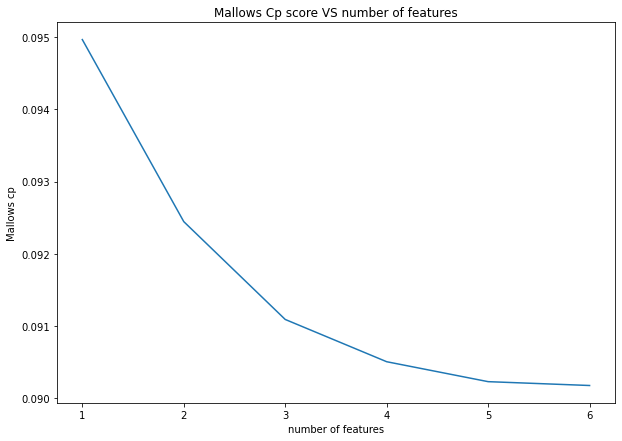

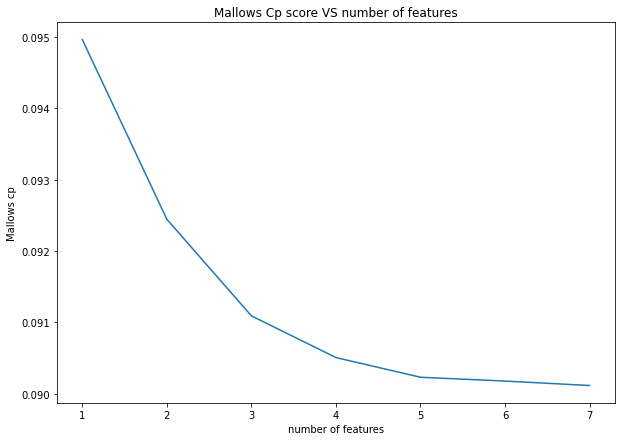

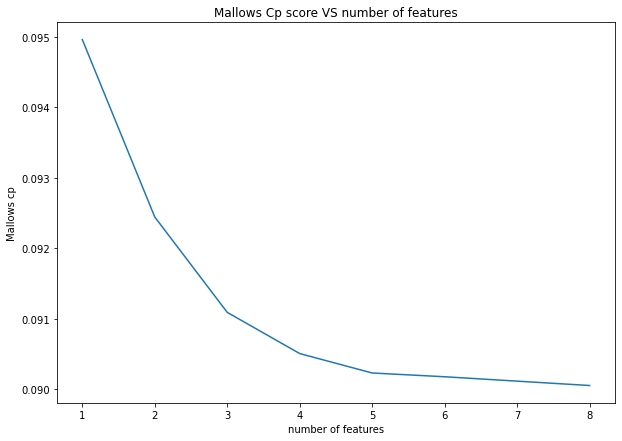

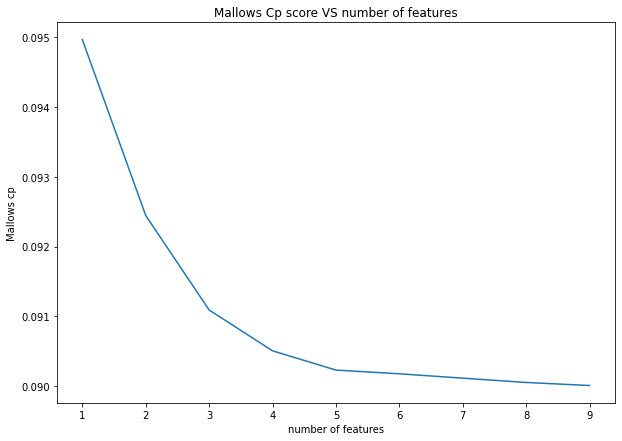

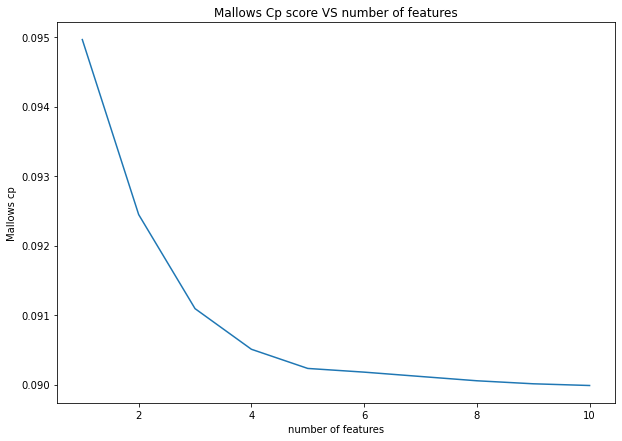

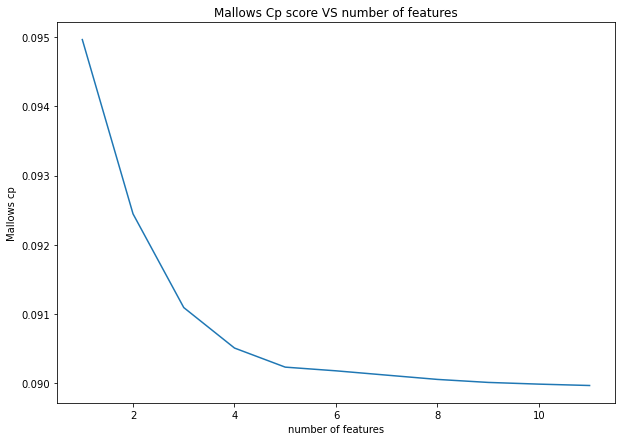

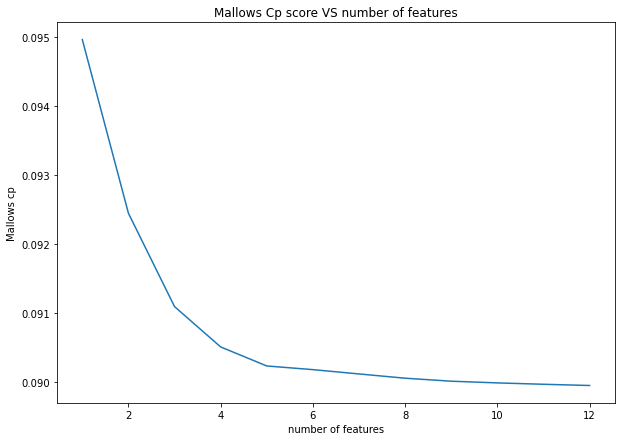

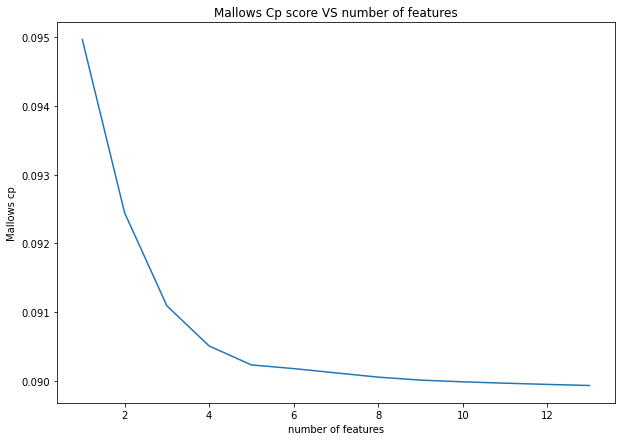

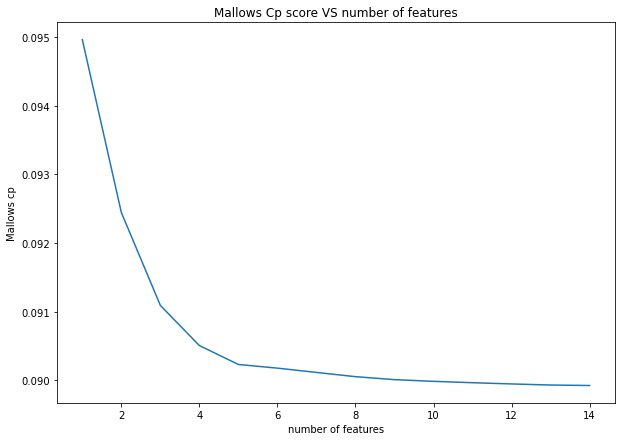

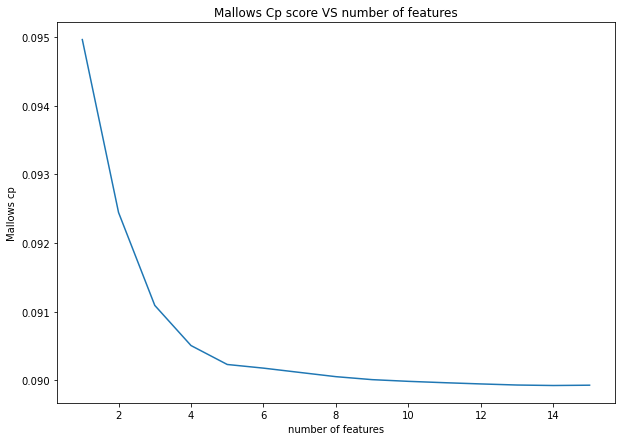

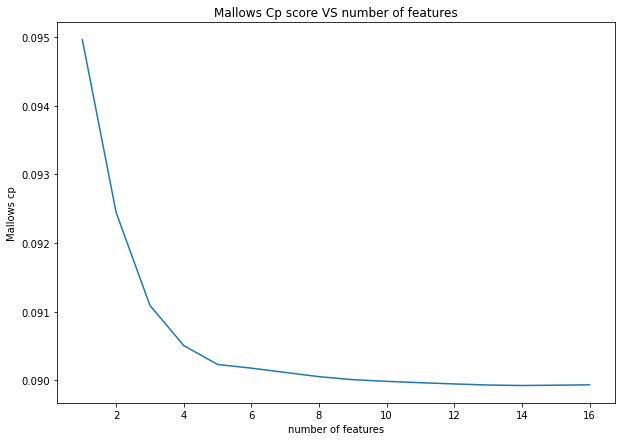

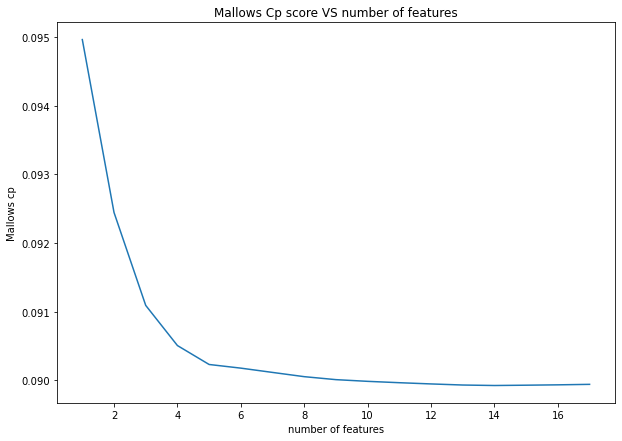

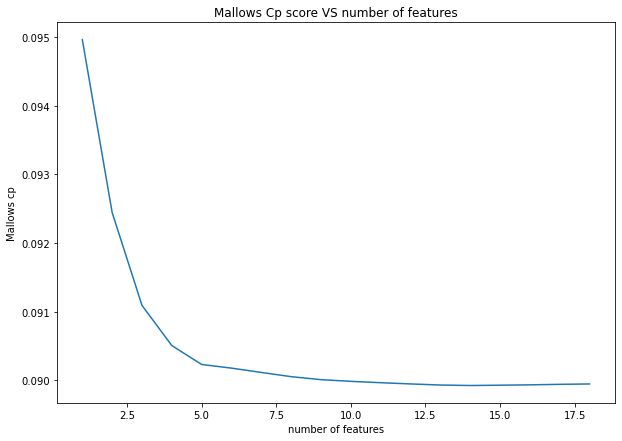

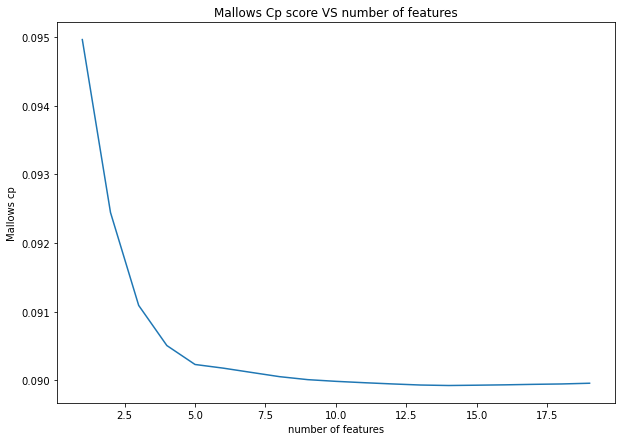

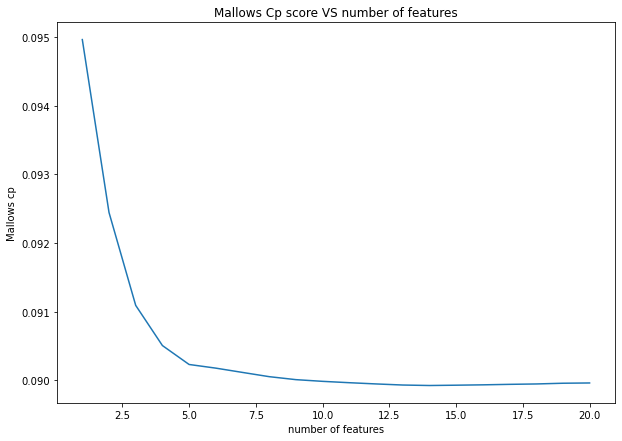

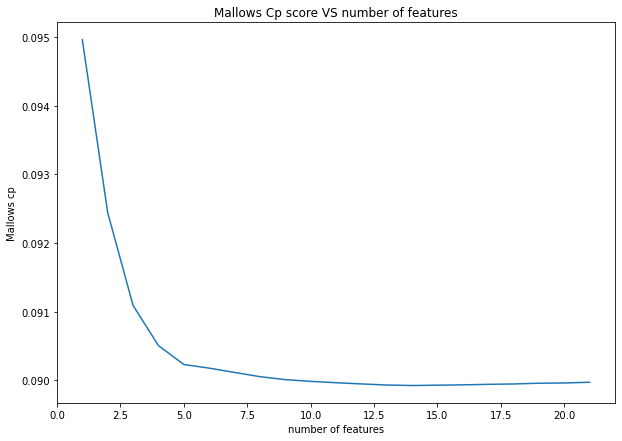

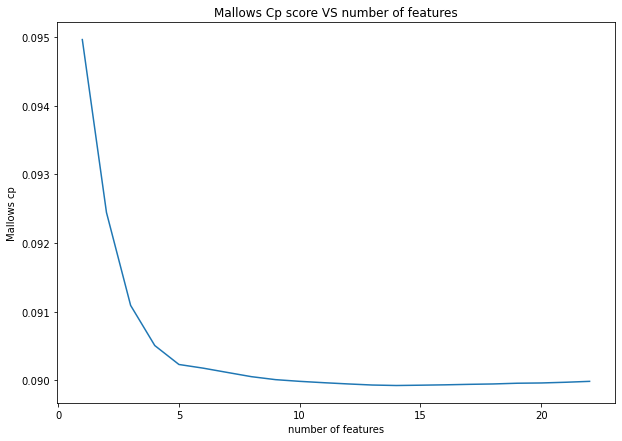

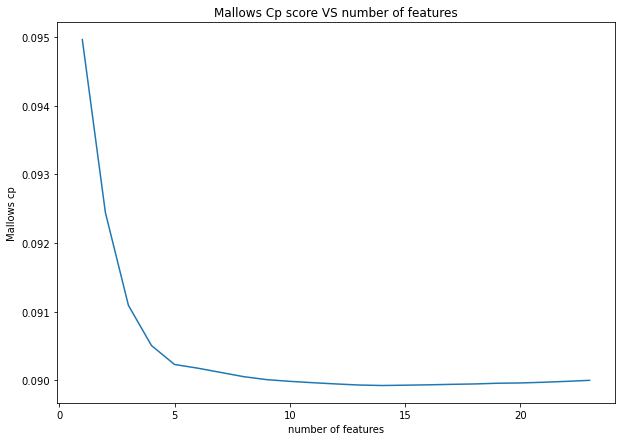

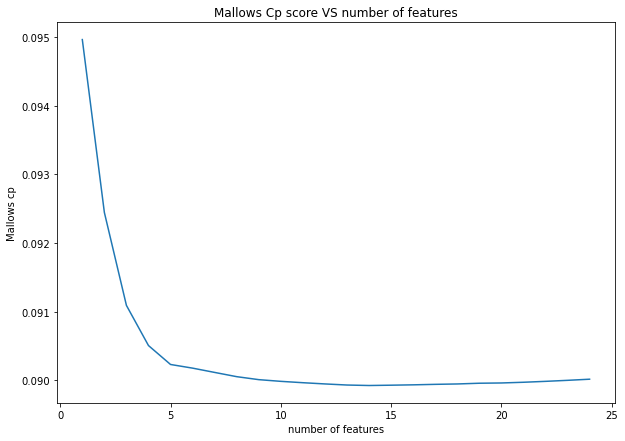

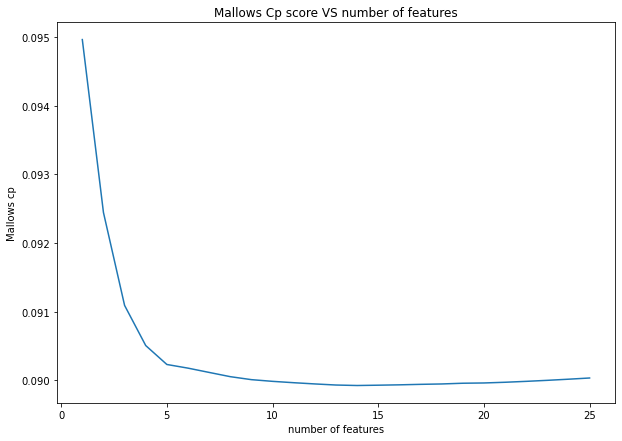

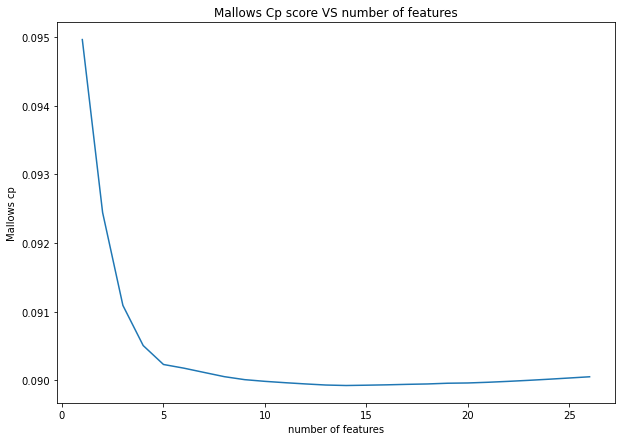

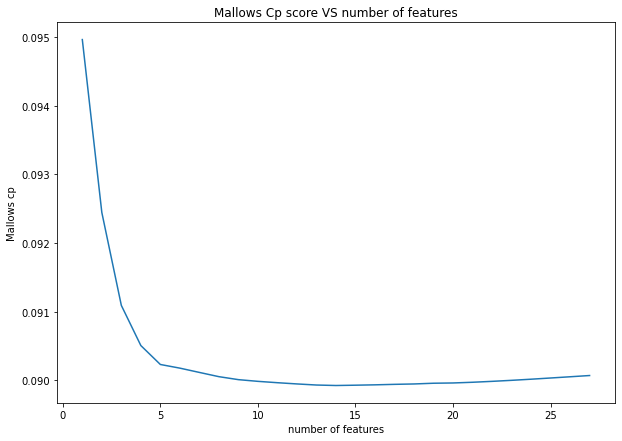

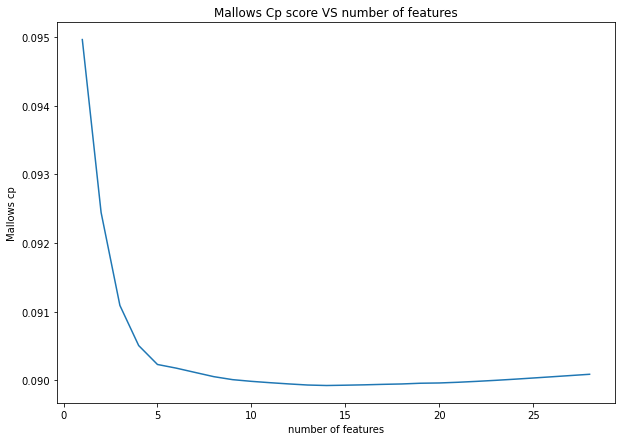

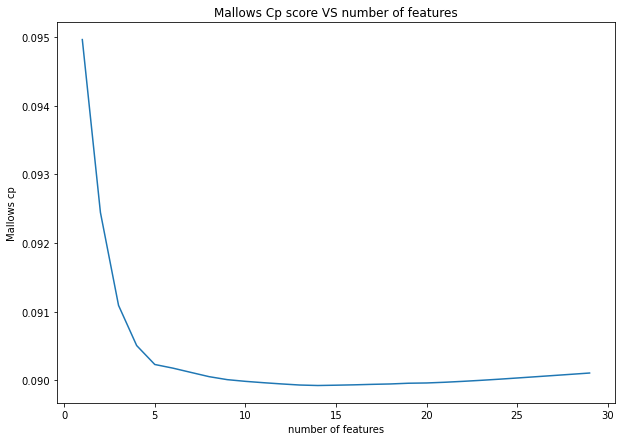

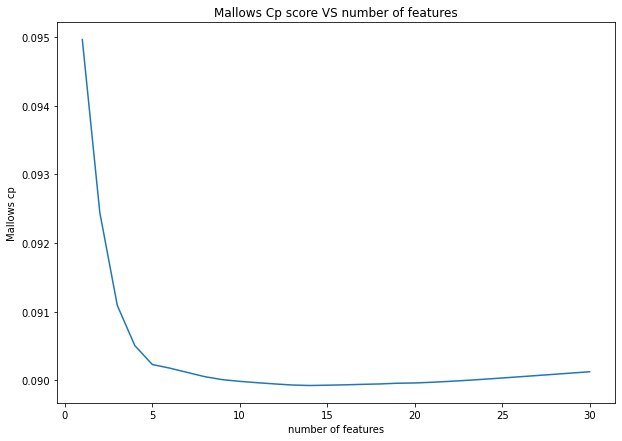

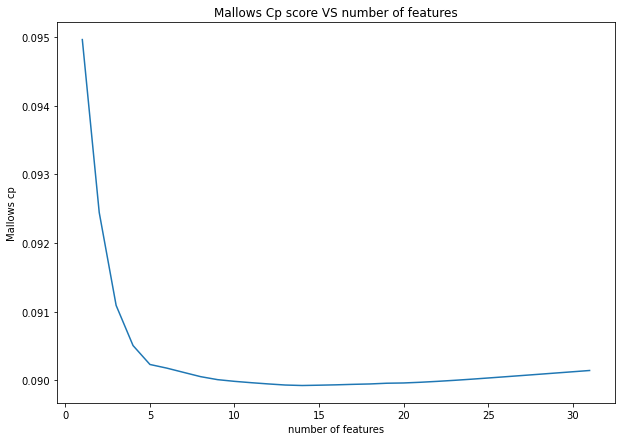

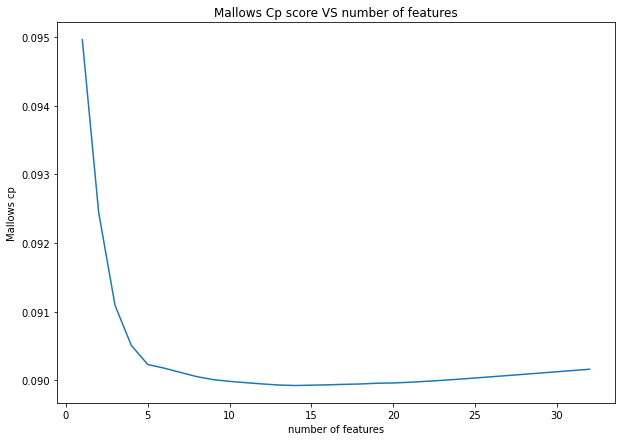

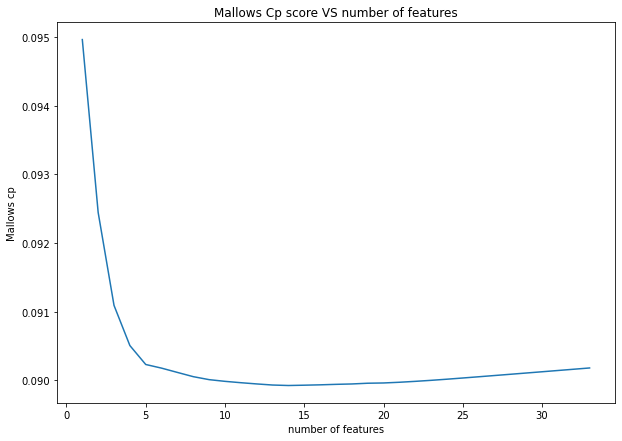

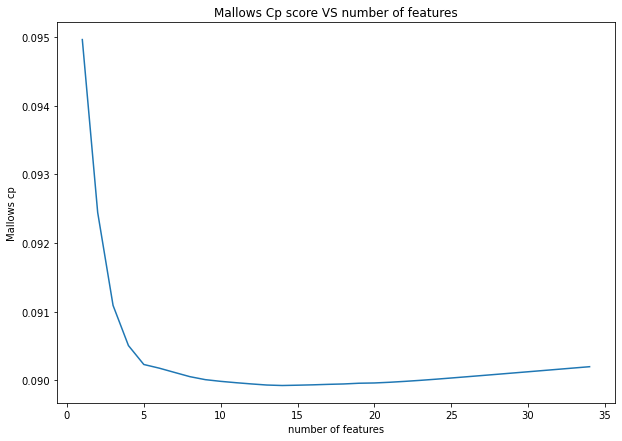

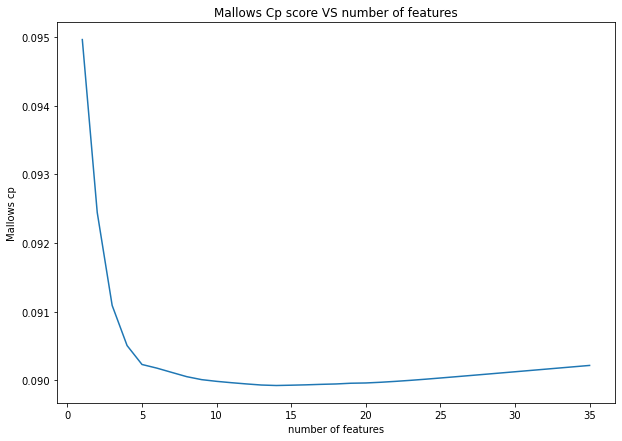

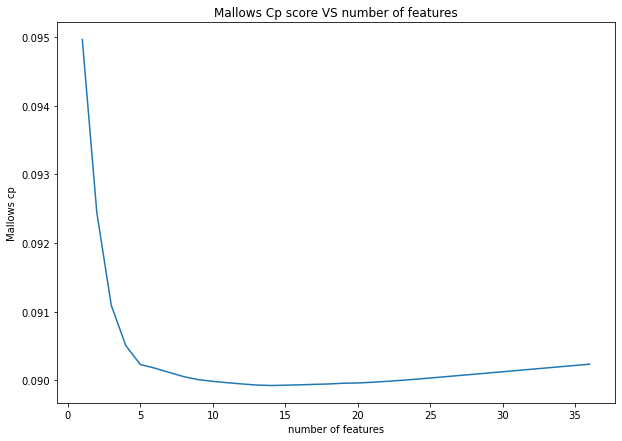

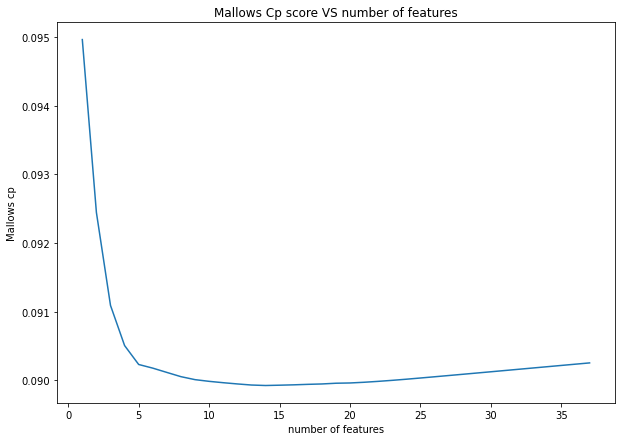

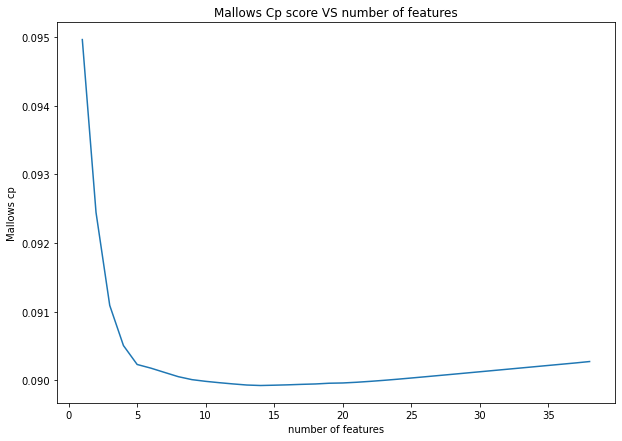

number of selected features by forward: 14


In [53]:
#MinMax scaled data
curX = X_norm.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_norm_new = X_norm.iloc[:, res_log_reg]

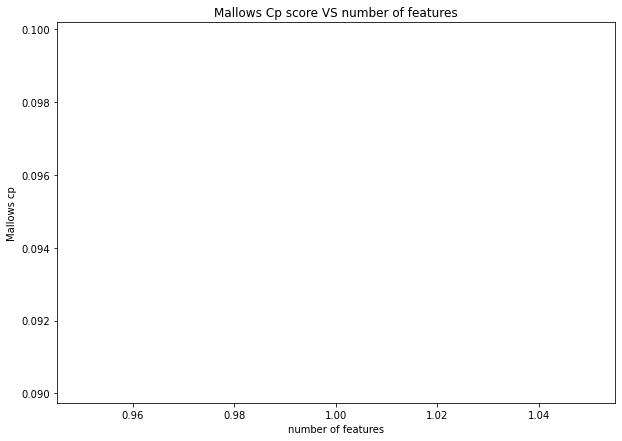

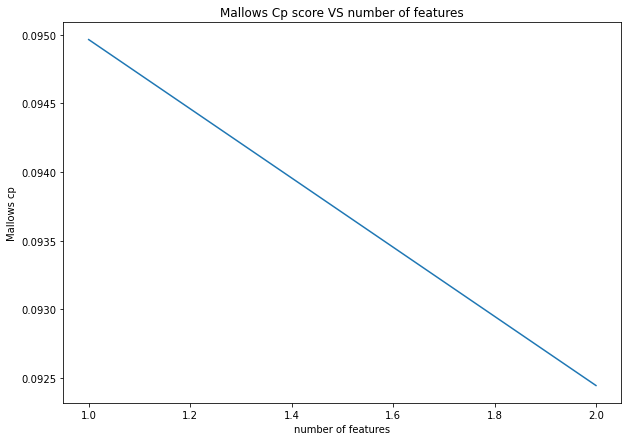

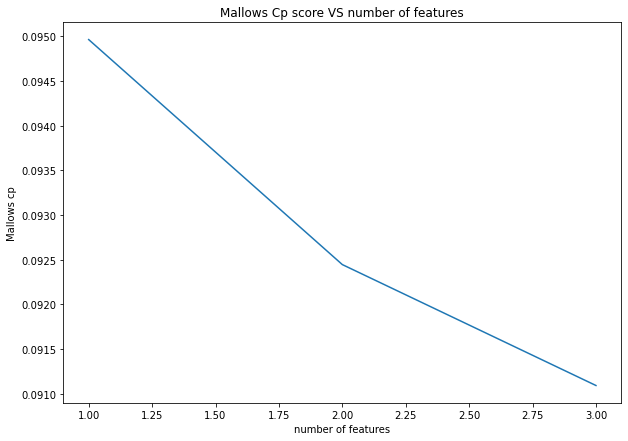

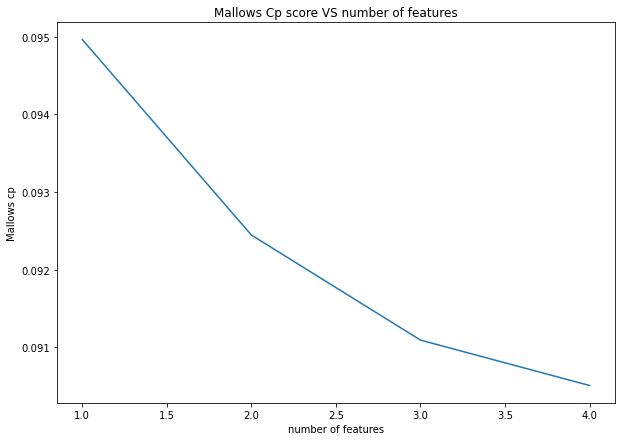

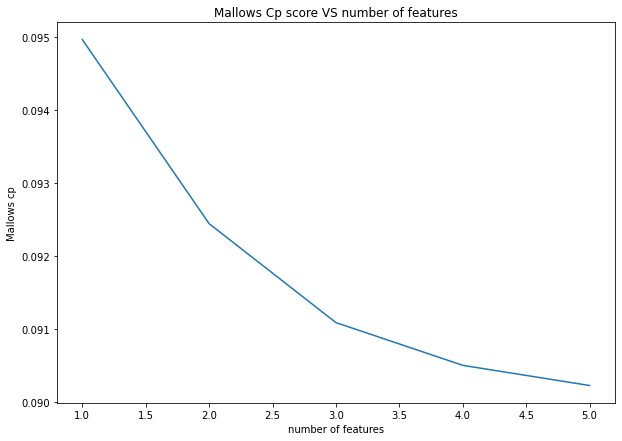

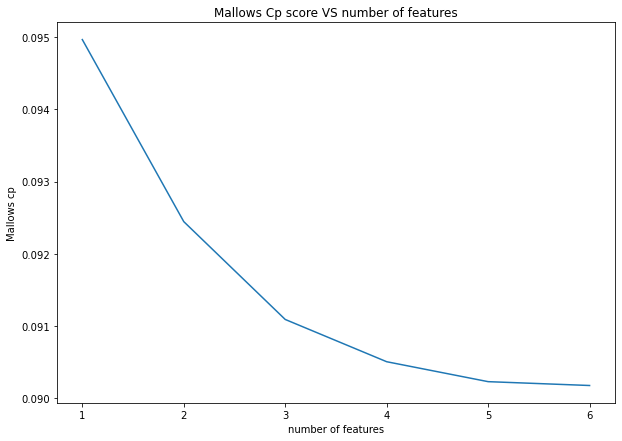

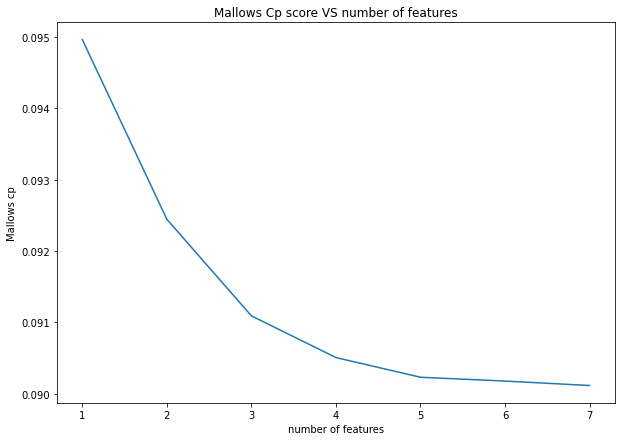

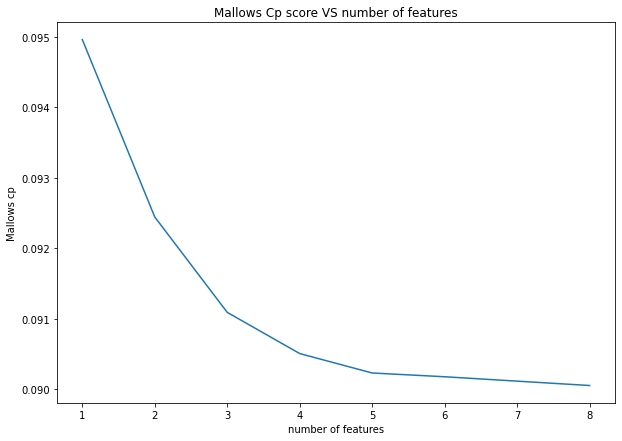

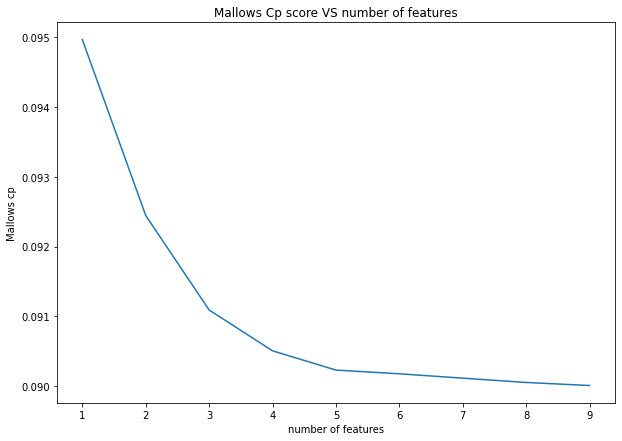

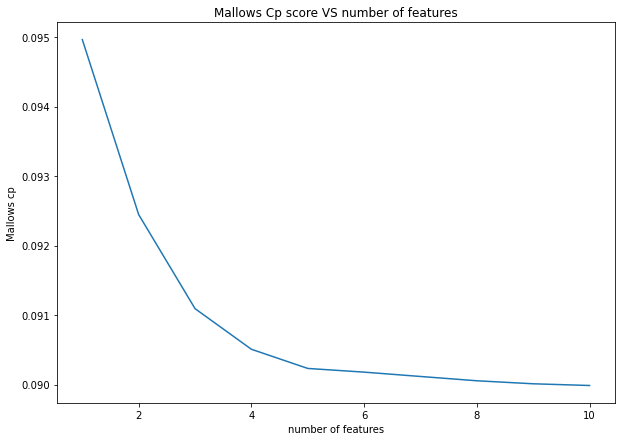

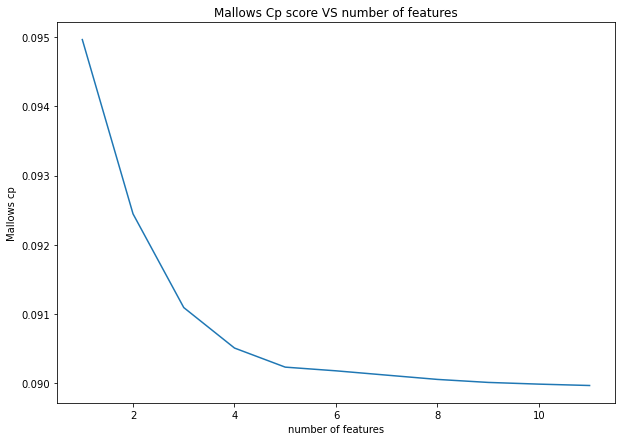

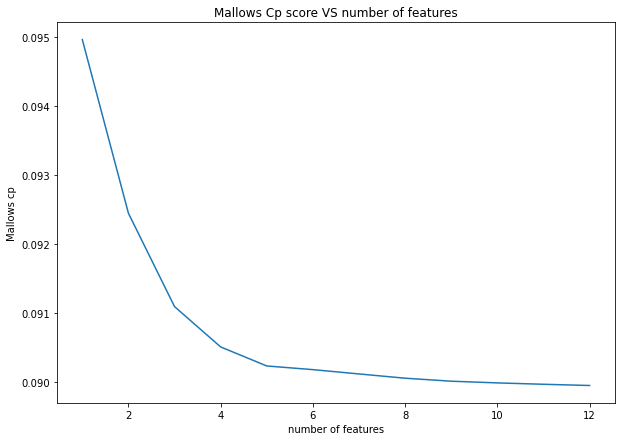

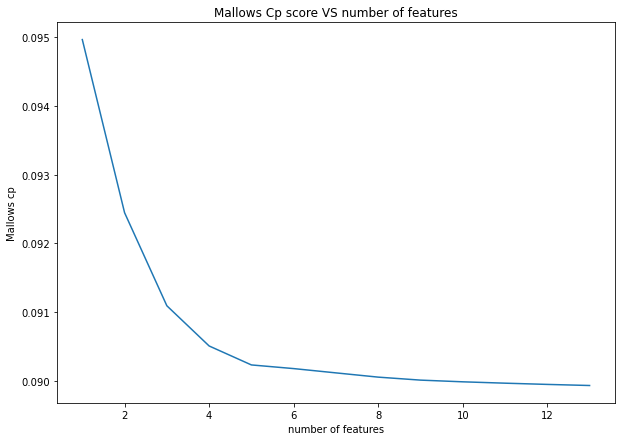

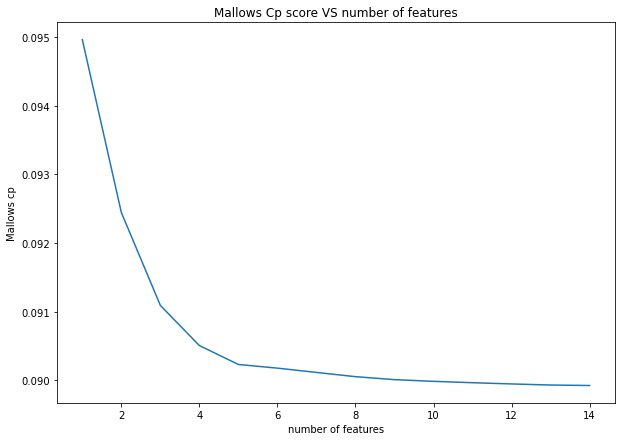

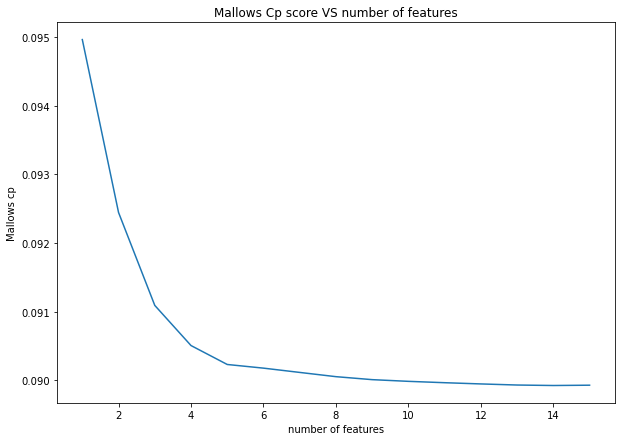

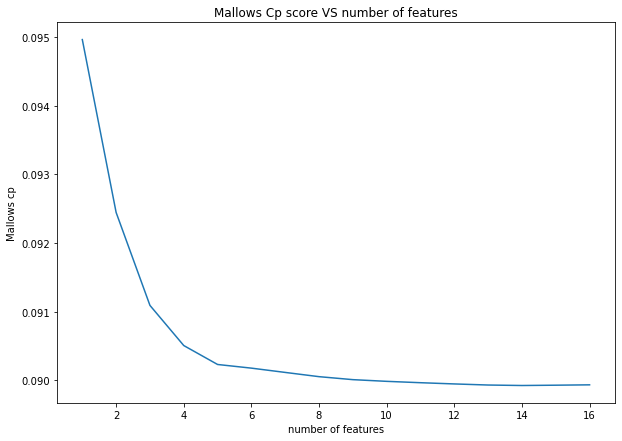

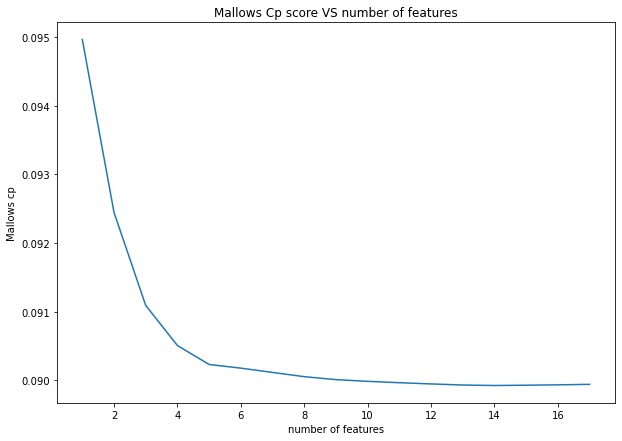

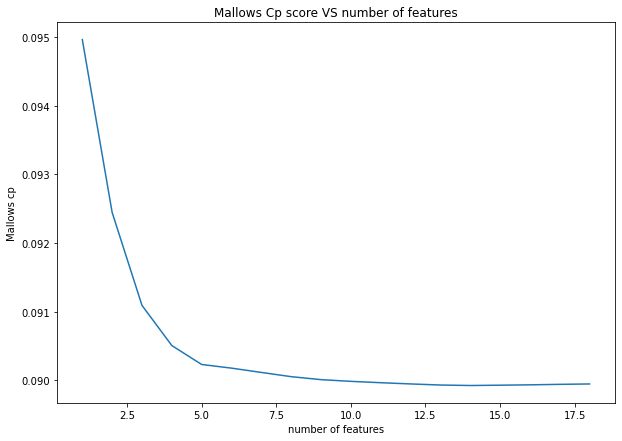

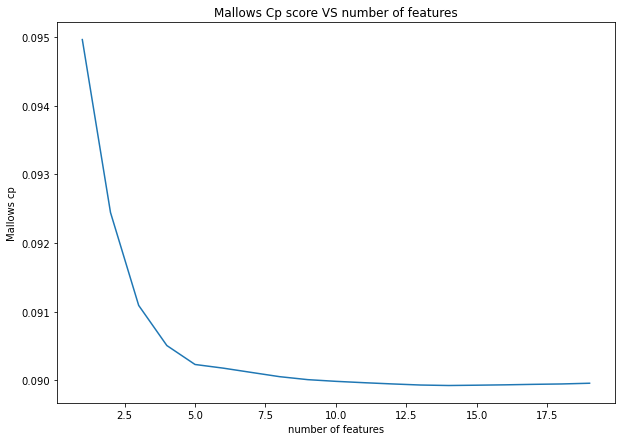

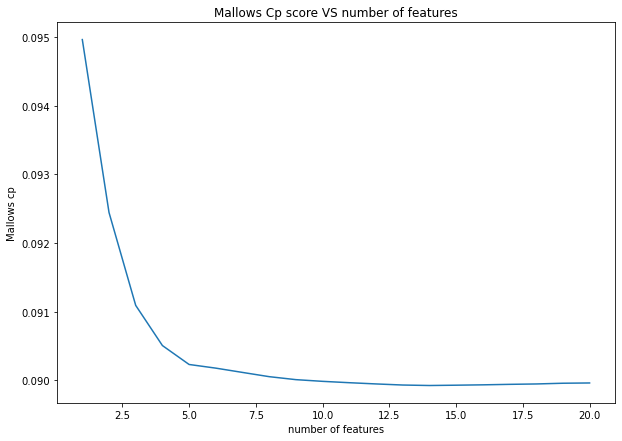

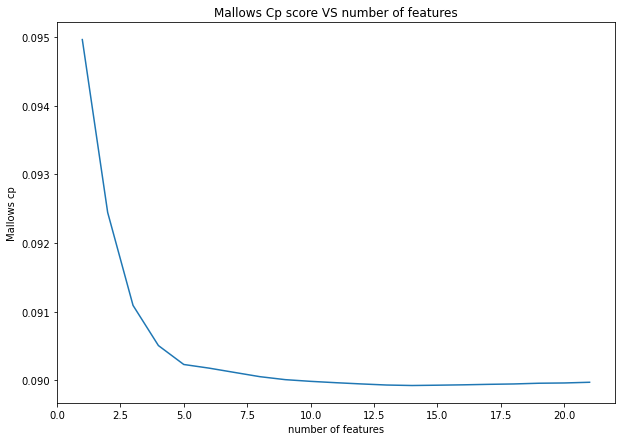

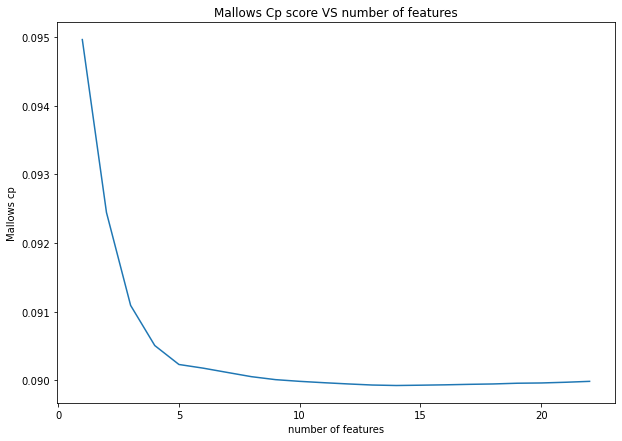

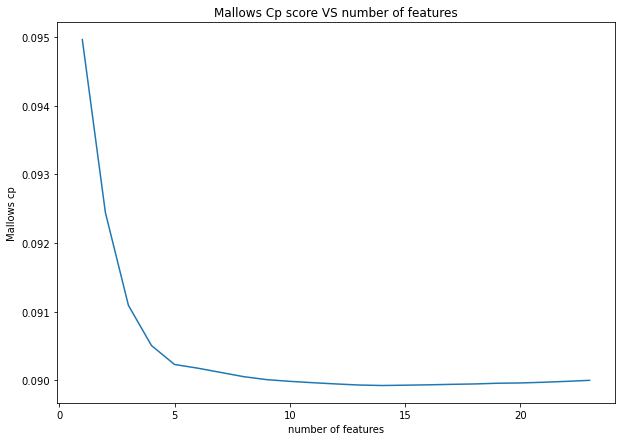

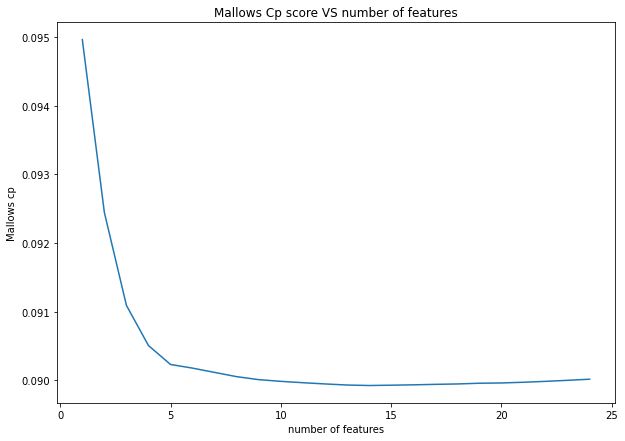

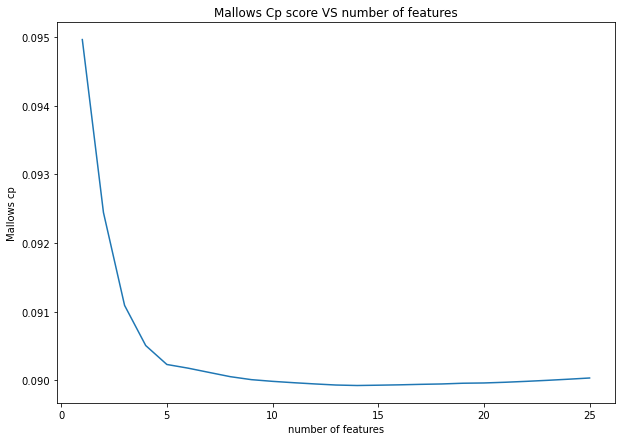

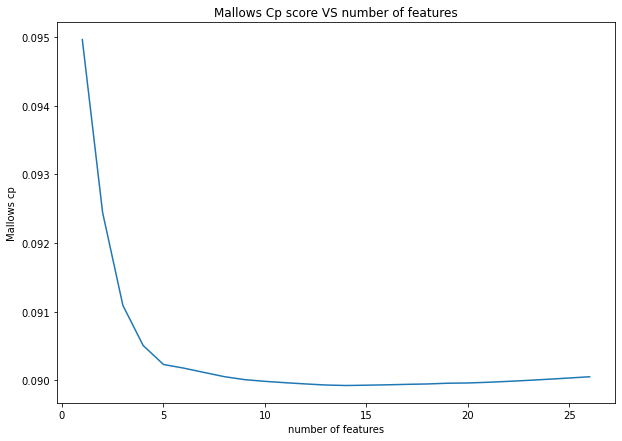

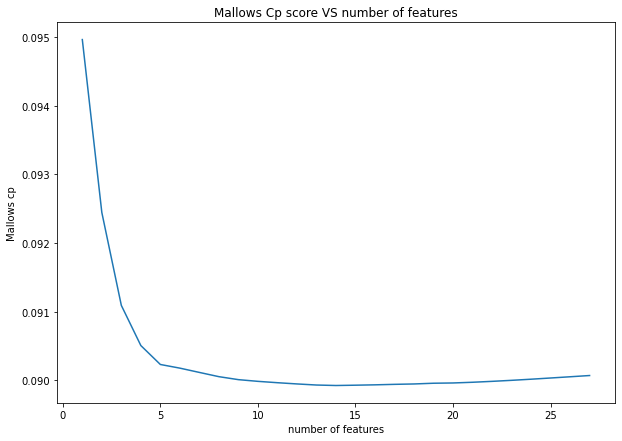

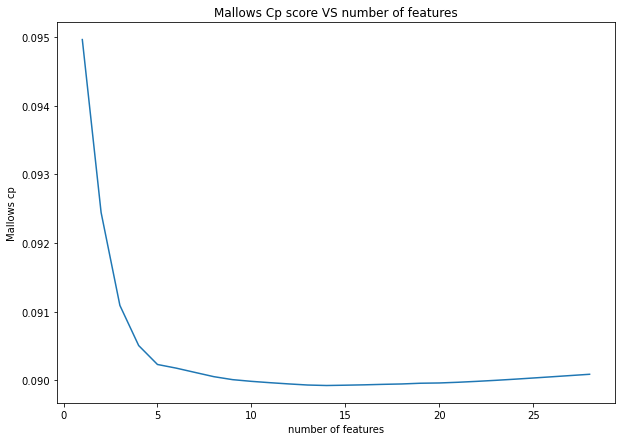

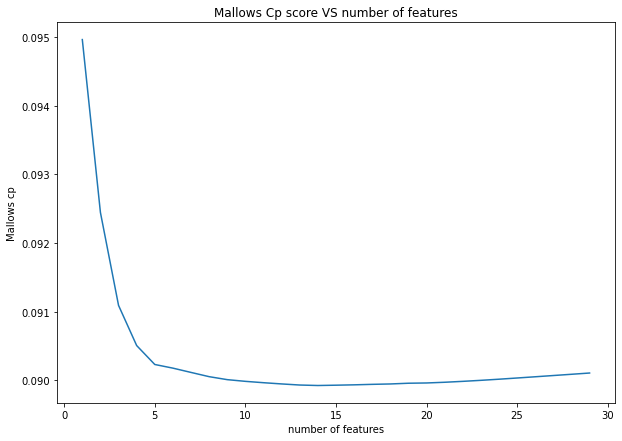

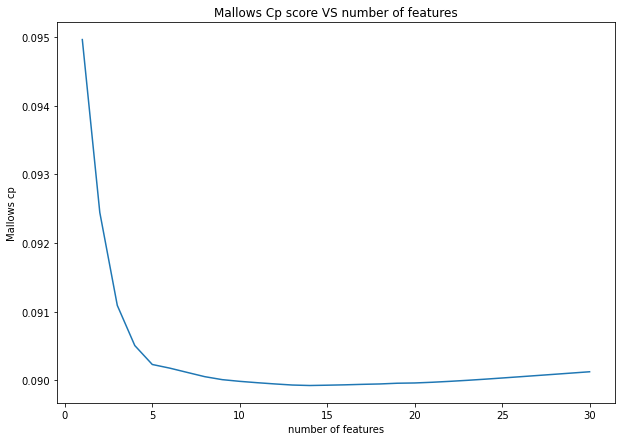

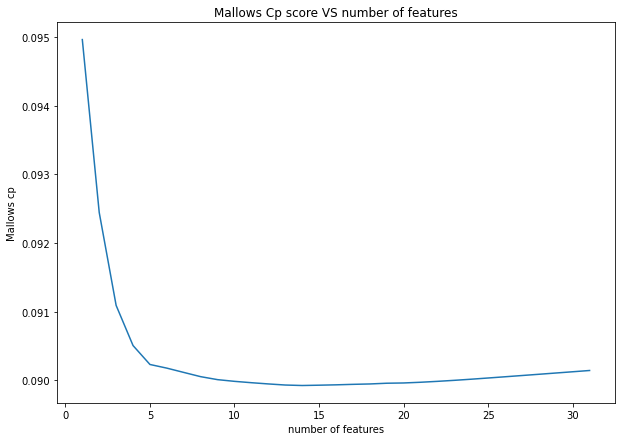

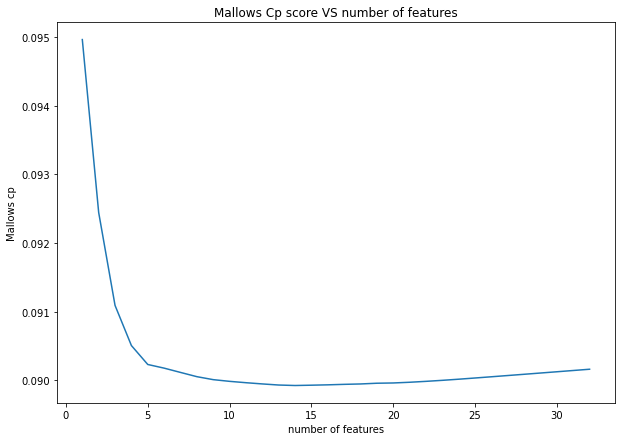

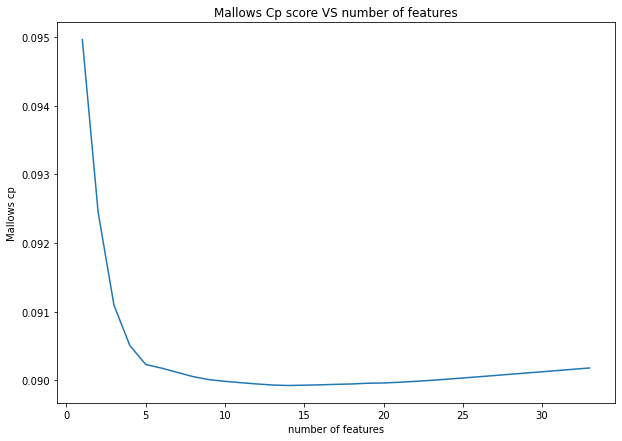

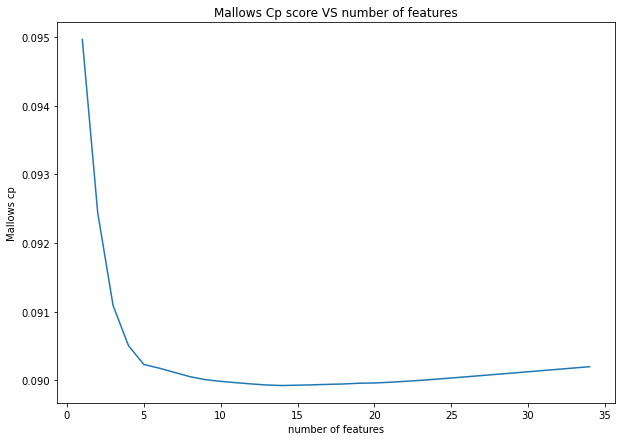

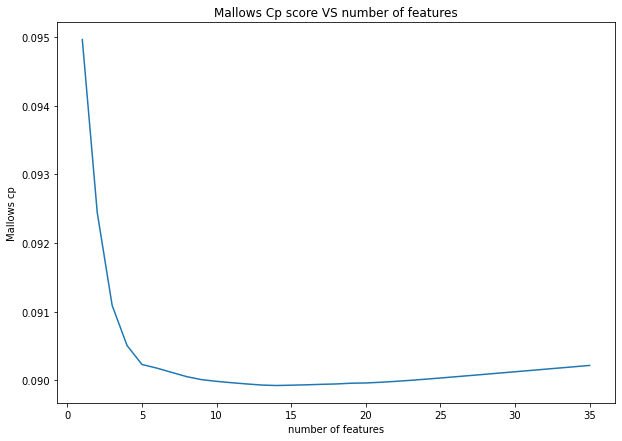

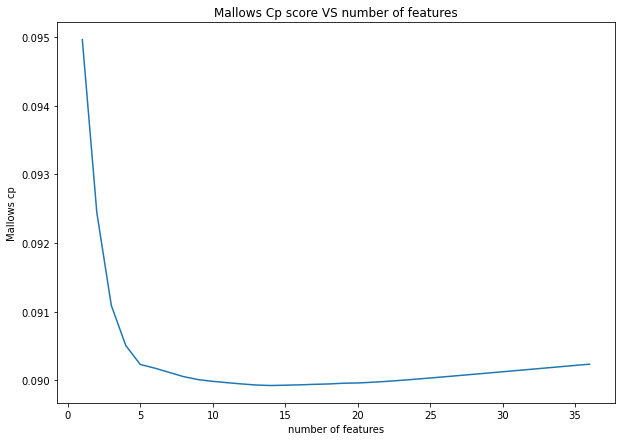

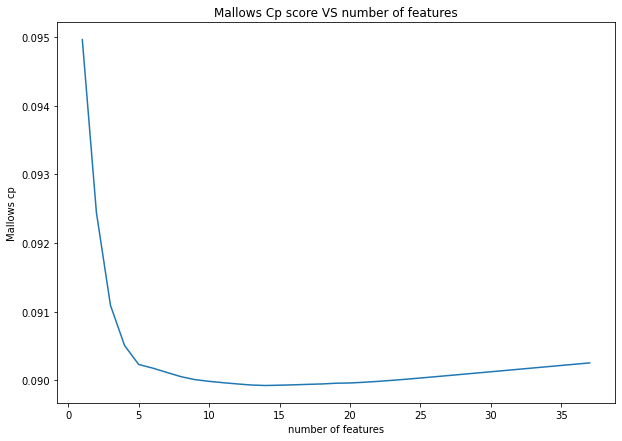

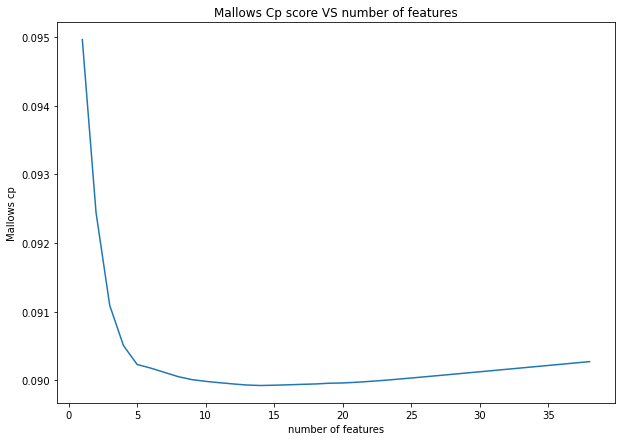

number of selected features by forward: 14


In [54]:
#Standard normaliztion
curX = X_Stn.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_Stn_new = X_Stn.iloc[:, res_log_reg]

We can see from the function above that the amount of the features reduces.<br>
Having irrelevant features in the data can decrease the accuracy of the models and make the model learn based on irrelevant features.

From a bias-variance standpoint, the more dimensions we have the higher variance we will have in our model, since the likelihood of us seeing a certain correlation of features decreases. 
Moreover, we saw in class that the more dimensions we add to the data, the harder it is for models to learn from it.

# Part 3 : Modeling


In [55]:
#split the dataset to train and validation
#We used test_size 0.2- by following the golden rule (:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_norm_new, y, test_size = 0.2, random_state= 42, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_Stn_new, y, test_size = 0.2, random_state= 42, shuffle=True)
lst_clf_params =[] #histograma of the clf
lst_auc =[] #histograma of the auc
lst_pred =[] #histograma of the pred_valid

In [56]:
#Modeling and plotting ROC
def modeling_roc(X_train, X_valid, y_train, y_valid, optimizer):
    #ROC curve
    #train
    pred_proba_train = optimizer.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, thresholdes_train = metrics.roc_curve(y_train,  pred_proba_train)
    auc_train = auc(fpr_train, tpr_train)
    #test--valid
    pred_proba_valid = optimizer.predict_proba(X_valid)[:,1]
    pred_valid = optimizer.predict(X_valid)
    fpr_valid, tpr_valid, thresholdes_valid = metrics.roc_curve(y_valid,  pred_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)
    
    #Plotting
    print("AUC train:", auc_train, '\n' "AUC valid:", auc_valid)
    plt.figure(figsize=(5,5))
    plt.plot(fpr_valid,tpr_valid,label="AUC="+str(auc_valid))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.text(0.33,0.70,'More accurate area',fontsize = 8)
    plt.text(0.7,0.1,'Less accurate area',fontsize = 8)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    return auc_valid, pred_valid

**We chose to use grid search in order to find the best parameters for each model and the parameters that are not mentioned in the Grid search, we took their defult values.**

We will show our simple models and plot their ROC, first for the data that is minmax scaled (X_norm_new), then for the data which is normalized by standard normaliztion (X_Stn_new).<br>
And we will show which one has the highest AUC for each model and choose the better normaliztion method.

**KNN**

AUC train: 0.9999999383525229 
AUC valid: 0.8880154295369658


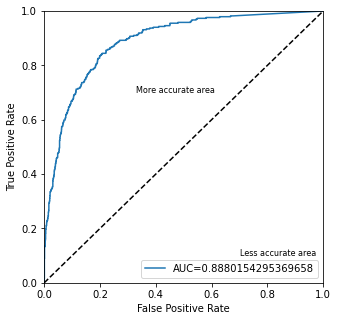

AUC train: 0.9999999383525229 
AUC valid: 0.891546733266141


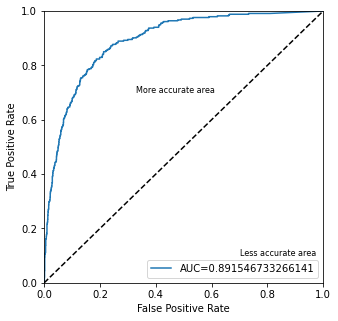

In [57]:
#KNN classifier
k_candidate=int(round(np.sqrt(X_raw_new.shape[0]),0))
#optional parameters for the classifier
knn_param = {'n_neighbors': [3,11,49,115,k_candidate],'weights': ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
'metric': ['minkowski','euclidean', 'manhattan']}
# The defualt parameters: *leaf_size=30, this can affect the speed of the construction and query, as well as the memory required to store the tree
# *p=2, power parameter,When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
# For arbitrary p, minkowski_distance (l_p) is used
# *metric_params=None, additional keyword arguments for the metric function
# *n_jobs=None #The number of parallel jobs to run for neighbors search. None means 1 in  our case

knn_clf1 = GridSearchCV(KNeighborsClassifier(), knn_param ,scoring='roc_auc',n_jobs=4)
#fitting the model - on the norm X
knn_clf1.fit(X_train1, y_train1)
knn_auc1, pred_valid_knn1 = modeling_roc(X_train1, X_valid1, y_train1, y_valid1, knn_clf1)

#fitting the model - on the Stn X
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_param ,scoring='roc_auc',n_jobs=4)
knn_clf.fit(X_train, y_train)
knn_auc, pred_valid_knn = modeling_roc(X_train, X_valid, y_train, y_valid, knn_clf)

if(knn_auc1 > knn_auc):
    lst_auc.append(knn_auc1)
    lst_pred.append(pred_valid_knn1)
    lst_clf_params.append(knn_clf1.best_params_)
    knn = KNeighborsClassifier(**knn_clf1.best_params_)
else:
    lst_auc.append(knn_auc)
    lst_pred.append(pred_valid_knn)
    lst_clf_params.append(knn_clf.best_params_)
    knn = KNeighborsClassifier(**knn_clf.best_params_)

**Logistic Regression**

AUC train: 0.8954069793821247 
AUC valid: 0.8890362838679078


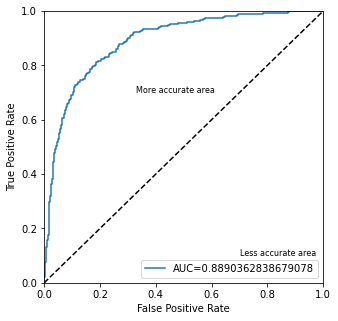

AUC train: 0.8974898010413984 
AUC valid: 0.8908278739550601


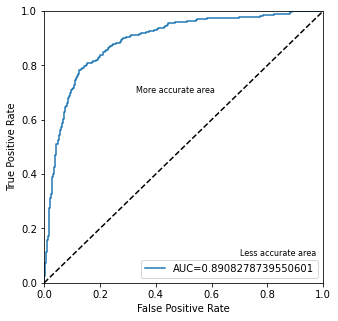

In [58]:
powers = range(-10,0)
logreg_param = {'penalty':['l1','l2','elasticnet'],'C' : [10**p for p in powers],\
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'multi_class':['auto','ovr','multinominal']}
# The defualt parameters: *dual=False, dual or primal formulation. Dual=False when n_samples > n_features
# *tol=0.0001, stopping critiria
# *fit_intercept=True,Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
# *intercept_scaling=1, Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. we use the default value
# *class_weight=None, all classes are supposed to have weight one
# *random_state=0, seed
# *max_iter=1000, Maximum number of iterations taken for the solvers to converge
# *verbose=0, For the liblinear and lbfgs solvers set verbose to any positive number for verbosity
# *warm_start=False, When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. 
# *n_jobs=None, #Number of CPU cores used when parallelizing over classes
# *l1_ratio=None #The Elastic-Net mixing parameter,default value

logreg_clf1 = GridSearchCV(LogisticRegression(), logreg_param ,scoring='roc_auc',n_jobs=4)
#fitting the model - on the norm X
logreg_clf1.fit(X_train1, y_train1)
log_auc1, pred_valid_lg1 = modeling_roc(X_train1, X_valid1, y_train1, y_valid1 ,logreg_clf1)

#fitting the model - on the Stn X
logreg_clf = GridSearchCV(LogisticRegression(), logreg_param ,scoring='roc_auc',n_jobs=4)
logreg_clf.fit(X_train, y_train)
log_auc, pred_valid_lg = modeling_roc(X_train, X_valid, y_train, y_valid ,logreg_clf)

if(log_auc1 > log_auc):
    lst_auc.append(log_auc1)
    lst_clf_params.append(logreg_clf1.best_params_)
    lst_pred.append(pred_valid_lg1)
    logReg = LogisticRegression(**logreg_clf1.best_params_)
else:
    lst_auc.append(log_auc)
    lst_clf_params.append(logreg_clf.best_params_)
    lst_pred.append(pred_valid_lg)
    logReg = LogisticRegression(**logreg_clf.best_params_)

***It's clear that the data that is standard scaled has the highest AUC rate for both of the models.***<br>
So we decided to continue our modeling only with that data. (X_Stn_new)

## Advanced models-

#### Random Forest

AUC train: 0.999999938352523 
AUC valid: 0.9091319217999644


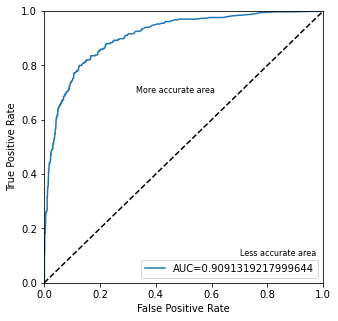

In [59]:
#Random Forest classifier
random_param = {'n_estimators' : [10,100,1000], 'criterion' : ['entropy','gini', 'log_loss'], \
                        'max_features' : ['log2','sqrt',None]}
# The defualt parameters: *max_depth= best_parameters['max_depth'],#The maximum depth of the tree.
# *min_samples_split= 2, The minimum number of samples required to split an internal node
# *min_samples_leaf= 1, The minimum number of samples required to be at a leaf node.
# *min_weight_fraction_leaf= 0.0, The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
# *max_leaf_nodes= None, Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# *min_impurity_decrease= 0.0, A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# *min_impurity_split= None, Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
# *bootstrap= True, Whether bootstrap samples are used when building trees. 
# *oob_score= False, Whether to use out-of-bag samples to estimate the generalization accuracy
# *n_jobs= None, The number of jobs to run in parallel
# *random_state= 0,  seed
# *verbose= 0, Controls the verbosity when fitting and predicting.
# *warm_start= False, When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest                         
# *class_weight=None all classes are supposed to have weight one

rf_clf = GridSearchCV(RandomForestClassifier(), random_param, scoring='roc_auc',n_jobs=4)

#fitting the model 
rf_clf.fit(X_train, y_train)
rf_auc, pred_valid_rf = modeling_roc(X_train, X_valid, y_train, y_valid,rf_clf)
lst_auc.append(rf_auc)
lst_clf_params.append(rf_clf.best_params_)
lst_pred.append(pred_valid_rf)
rf = RandomForestClassifier(**rf_clf.best_params_)


#### Multi Layers

AUC train: 0.9439669436364514 
AUC valid: 0.9111893786684058


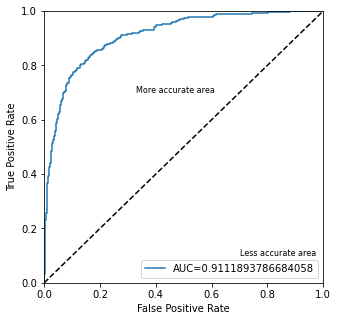

In [60]:
#MLP classifier
mlp_param = { 'activation' : ['identity', 'logistic', 'tanh', 'relu'],'solver' : ['lbfgs', 'sgd', 'adam'],\
                'learning_rate' : ['constant', 'invscaling', 'adaptive']}
# The defualt parameters: 
# We checked the grid search with a few options of hidden layers sizes and alpha (small ones and bigger ones..)
# And we saw that the AUC difference is minor while the running time is significantly higher-
# therefore we stayed with it's defualt value: hidden_layer_sizes=(100,),alpha = 0.01
# *batch_size = 'auto',Size of minibatches for stochastic optimizers.When set to “auto”, batch_size=min(200, n_samples) 
# *learning_rate_init = 0.01,  The initial learning rate used. It controls the step-size in updating the weights  
# *power_t = 0.5 ,  The exponent for inverse scaling learning rate.
# *max_iter = 1500, Maximum number of iterations 
# *shuffle = True, Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam 
# *random_state = 21, seed        
# *tol = 1e-4, Tolerance for the optimization
# *verbose = False, Whether to print progress messages to stdout.
# *warm_start = False, When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. 
# *momentum = 0.9, Momentum for gradient descent update
# *nesterovs_momentum = True,Whether to use Nesterov’s momentum
# *early_stopping = False, Whether to use early stopping to terminate training when validation score is not improving.
# *validation_fraction = 0.1, #The proportion of training data to set aside as validation set for early stopping.
# *beta_1 = 0.9, Exponential decay rate for estimates of first moment vector in adam, not relevant since we chose sgd but a default value
# *beta_2 = 0.999, Exponential decay rate for estimates of second moment vector in adam, not relevant since we chose sgd but a default value
# *epsilon = 1e-8, Value for numerical stability in adam.not relevant since we chose sgd but a default value
# *n_iter_no_change = 10, Maximum number of epochs to not meet tol improvement.
mlp_clf = GridSearchCV(MLPClassifier(), mlp_param, scoring='roc_auc',n_jobs=4)
#fitting the model 
mlp_clf.fit(X_train, y_train)
mlp_auc, pred_valid_mlp = modeling_roc(X_train, X_valid, y_train, y_valid, mlp_clf)
lst_auc.append(mlp_auc)
lst_clf_params.append(mlp_clf.best_params_)
lst_pred.append(pred_valid_mlp)
mlp = MLPClassifier(**mlp_clf.best_params_)

# Part 4 - Evaluation

In [61]:
#Confustion matrix function
def confusion_matrix_ss(y_valid, pred_valid):
    new_acc = np.mean(pred_valid == y_valid)
    print("Accuracy is:%f"%new_acc)
    c_mat = confusion_matrix(pred_valid, y_valid)
    TN, FP, FN, TP = c_mat.ravel()
    print(TN, FP, FN, TP)
    sns.heatmap(c_mat, annot=True, fmt='g',cmap='pink', xticklabels = [0,8], yticklabels = [0,8])
    plt.title('Confusion Matrix : MLP Classifier')
    plt.text(1.33,0.33,'False Positive',fontsize = 12, color='w')
    plt.text(0.33,0.33,'True Negative',fontsize = 12)
    plt.text(1.33,1.33,'True Positive',fontsize = 12, color='w')
    plt.text(0.33,1.33,'False Negative',fontsize = 12, color= 'w')
    plt.show()

Accuracy is:0.892821
1548 141 68 193


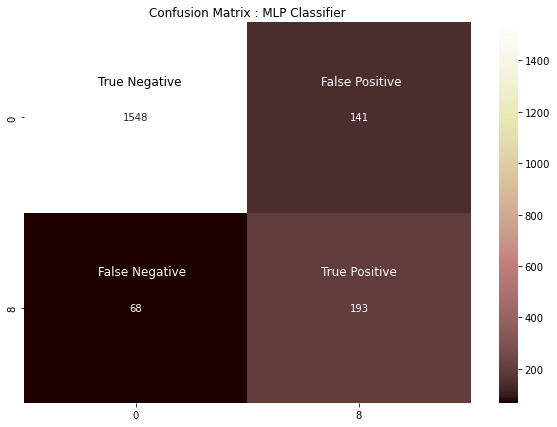

In [62]:
#Evaluating the model with the highest AUC
pred_valid = lst_pred[lst_auc.index(max(lst_auc))]
confusion_matrix_ss(y_valid, pred_valid)

## The results of the confustion matrix:

True negative represents the 1530~ sessions that were predicted as the sessions that "not purchased" (purchase = 0), and were predicted correctly.<br>False Negative represents the 85~ sessions that were predicted as the sessions that "not purchased" (purchase = 0), and were not predicted correctly.<br> True positive represents the 185~ sessions that were predicted as the sessions that "purchased" (purchase = 1), and were predicted correctly.<br> False positive represents the 131~ sessions that were predicted as the sessions that that "purchased" (purchase = 1), and were not predicted correctly.<br>
Those results makes sense since the data is imbalanced (as we've mentioned before), most of the observations are of sessions that didn't ended with a purchase..<br>
***The acurracy of the model is pretty high almost 90%***

## K-FOLD CROSS VALIDATION

In [63]:
for i in range(len(lst_clf_params)):
    print(lst_clf_params[i])

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 115, 'weights': 'distance'}
{'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000}
{'activation': 'relu', 'learning_rate': 'adaptive', 'solver': 'adam'}


In [64]:
kfold = KFold(n_splits=5,shuffle=False)
clf_models = {'KNN' : knn, 'Logistic Regression' : logReg, 'Random Forest' : rf , 'MLP' : mlp }

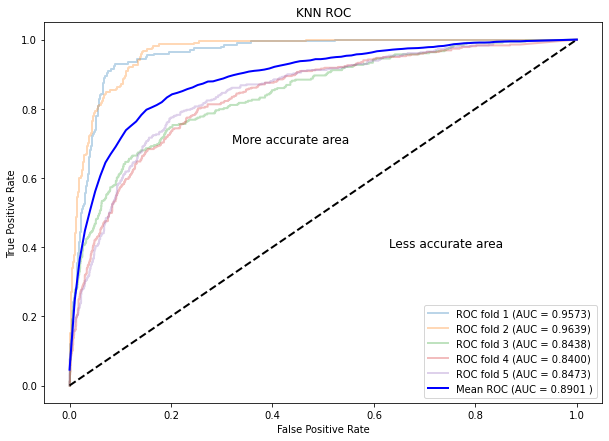

KNN : Mean ROC (AUC = 0.8901)


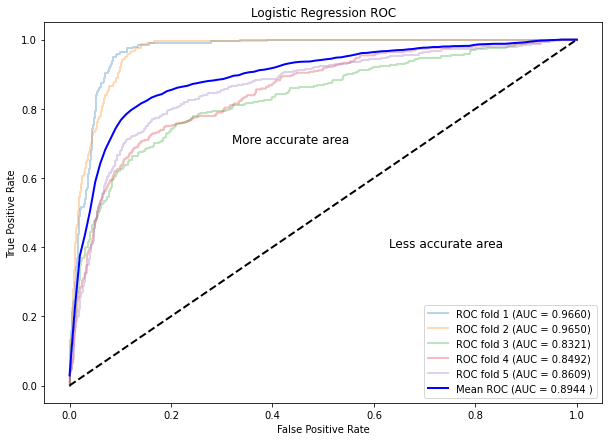

Logistic Regression : Mean ROC (AUC = 0.8944)


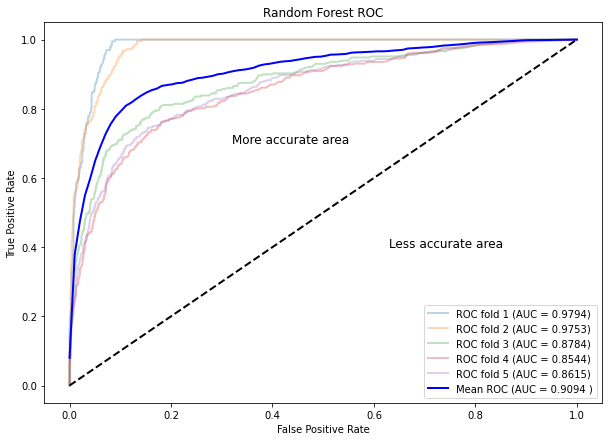

Random Forest : Mean ROC (AUC = 0.9094)


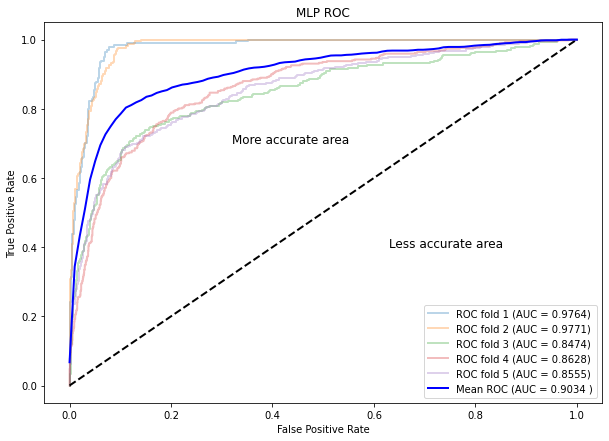

MLP : Mean ROC (AUC = 0.9034)


In [65]:
for model in clf_models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train, valid in kfold.split(X_Stn_new):
        pred_proba_kfold = model[1].fit(X_Stn_new.iloc[train],y[train]).predict_proba(X_Stn_new.iloc[valid])
        fpr, tpr, t = roc_curve(y[valid], pred_proba_kfold[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
        i = i + 1

    # Ploting
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.4f )' % (mean_auc),lw=2, alpha=1)
   
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model[0]} ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.show()
    print(model[0],': Mean ROC (AUC = %0.4f)' %mean_auc)

# Over Fitting

In [66]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X_valid,y):
    #param X: Matrix of input features
    #param y: Vector of Target/Label
    #We aren't splitting the data into train and test because we will use StratifiedKFoldCV
    clf3 = LogisticRegression()
    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True)       #creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(clf3,X,y,scoring="accuracy",cv=cv)    #storing the CV scores (accuracy) of each fold
    
    #fitting the model
    clf3.fit(X,y) 

    #scoring the model on train set
    train_score = clf3.score(X,y) 
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=clf3,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)                        #converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)                          #converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}


Text(0, 0.5, 'Misclassification Rate/Loss')

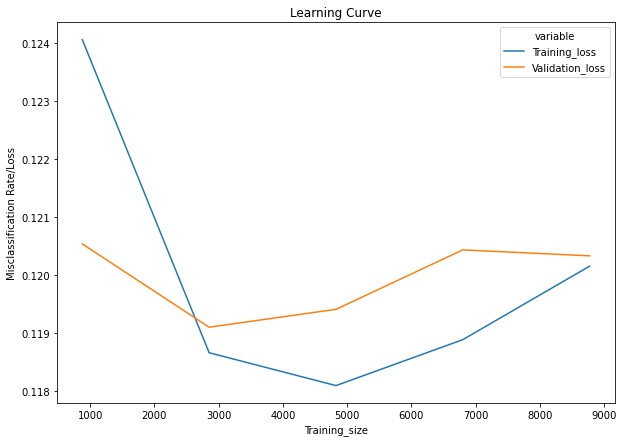

In [67]:
X = np.concatenate((X_train, X_valid), axis=0)
Y = np.concatenate((y_train, y_valid), axis=0)
lc = learn_curve(X,Y)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss")

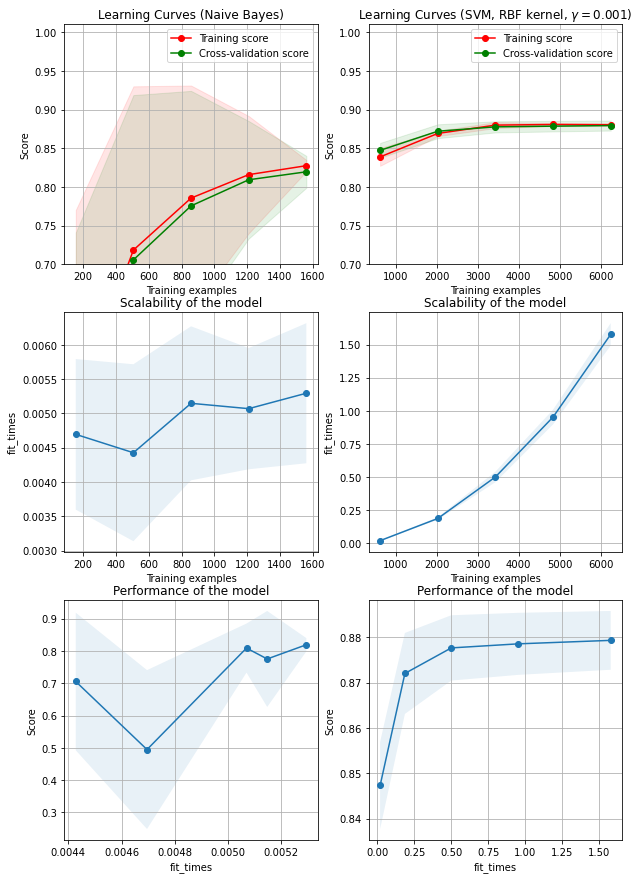

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g",)
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_valid, y_valid, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

# Predicting the test

In [89]:
#With forward selection on the train and test

y_final = X_raw_new.values[:,8]
# Prediction to test data using MLP model- model with the highest AUC
mlp_fin=MLPClassifier(activation ='relu', learning_rate='adaptive', solver='adam')
mlp_fin.fit(X_raw_new,y_final)
#Predicting the test using the MLP model
test1 = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
final_test = pre_processing(test1,  other_device_lst, other_region_lst, dict_info, categorial_features)
final_test_1 = final_test.iloc[:,res_log_reg]

test_final_sub = mlp_fin.predict_proba(final_test_1)
test_sub = pd.DataFrame(test_final_sub[:,1])
#exporting the probability for the label "1" to a CSV file
test_sub.to_csv("Submission_group_42.csv")

# Pipeline

number of selected features by forward: 14
number of selected features by forward: 14
number of selected features by forward: 14
AUC train: 0.9999999383525229 
AUC valid: 0.8880154295369658
AUC train: 0.9999999383525229 
AUC valid: 0.891546733266141
AUC train: 0.8954085822165277 
AUC valid: 0.8890288729471749
AUC train: 0.8974937464799291 
AUC valid: 0.8908315794154266
AUC train: 0.999999938352523 
AUC valid: 0.9076506640184976
AUC train: 0.9454811289675082 
AUC valid: 0.9119749362660818
KNN : Mean ROC (AUC = 0.9034)
Logistic Regression : Mean ROC (AUC = 0.9034)
Random Forest : Mean ROC (AUC = 0.9034)
MLP : Mean ROC (AUC = 0.9034)
Runtime: 940.25 seconds


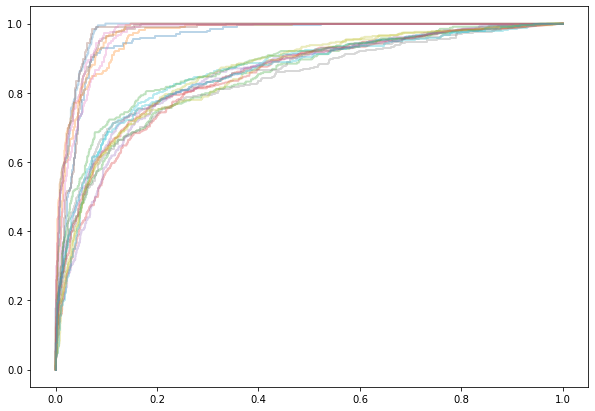

In [87]:
t0 = time.time() # for Runtime measurement
data = pd.read_csv("train.csv")
del data['D']
dict_info = {}
#for missing values
def fill_na_with_median(data, feature):
    feature_median = data[feature].median()
    data[feature] = data[feature].fillna(feature_median)
    dict_info[feature] = feature_median
def fill_na_with_mean(data, feature):
    feature_mean = data[feature].mean()
    data[feature] = data[feature].fillna(feature_mean)
    dict_info[feature] = feature_mean
def fill_na_with_most_freq(data, feature ):
    feature_most_freq = list(data[feature].mode())[0]
    data[feature] = data[feature].fillna(feature_most_freq)
    dict_info[feature] = feature_most_freq
# Take data with TRUE or FALSE and make labels 1 or 0 accordingly
data['Weekend'].replace({True:1,False:0},inplace=True)

#Changing returning visitor to 1 and other or new visitor to 0
data['user_type'].replace({"Returning_Visitor":1,"New_Visitor":0, "Other":0},inplace=True)
#Getting categorial features of a data frame
def getting_categorial_features(data):
    all_Cols= data.columns
    numeric_cols= data.select_dtypes(include=[np.number]).columns
    noNum_cols =list(set(all_Cols)-set(numeric_cols))
    return noNum_cols
# striping unneccery strings from the columns
def strip_Func(df, feature, word):
    df[feature] = df[feature].str.strip(word)
# changing types to float
def types_Func(df, feature):
    df[feature] = df[feature].astype(float)
strip_Func(data, 'product_page_duration', ' minutes')
strip_Func(data, 'info_page_duration', ' minutes')
types_Func(data, 'product_page_duration')
types_Func(data, 'user_type')
types_Func(data, 'info_page_duration')
fill_na_with_most_freq(data,'internet_browser')
data['internet_browser'] = data['internet_browser'].str.split('_', expand=True)[0]
data = pd.concat([data, pd.get_dummies(data['internet_browser'])], axis=1)
del data['internet_browser']
#replacing Nan values to the median due to the skewed disrabution
median_lst = ['info_page_duration','admin_page_duration','product_page_duration','num_of_info_pages','num_of_admin_pages','num_of_product_pages']
for lst in median_lst:
    fill_na_with_median(data,lst)

#combining the features
data['total_pageDuration'] = data['product_page_duration']+data['info_page_duration']+data['admin_page_duration']
del data['product_page_duration'], data['info_page_duration'], data['admin_page_duration']
data['total_pageNumbers'] = data['num_of_product_pages']+data['num_of_info_pages']+data['num_of_admin_pages']
del data['num_of_admin_pages'], data['num_of_product_pages'], data['num_of_info_pages']
data.rename(columns={'total_duration':'total_session_duration'}, inplace= True)
del data['total_session_duration'], data['A']
fill_na_with_median(data,'ExitRates')
fill_na_with_median(data,'BounceRates')
fill_na_with_median(data,'PageValues')
fill_na_with_mean(data,'B')
fill_na_with_mean(data,'closeness_to_holiday')
data['C'] = data['C'].fillna('a')
data = data.loc[(data['C'] !='a')]
fill_na_with_median(data,'user_type')
fill_na_with_median(data,'Weekend')
fill_na_with_most_freq(data,'Month')
fill_na_with_most_freq(data,'device')
fill_na_with_most_freq(data,'Region')
train_data_no_catergory = data.copy()
categorial_features = ['C','Region','Month','device','browser','chrome','edge','safari']
for col in categorial_features:
     del train_data_no_catergory[col]
#Combinig groups with low values
def comb_Lowvalues(data, feature):
    saved_values_for_reducing = {}
    x = list(data[feature].value_counts().index)
    y = list(data[feature].value_counts())
    lst = []
    for j in range(0, len(x)):
        if (feature == 'device'):
            if (y[j] / sum(y)) <= 0.01:
                lst.append(x[j])
        elif (feature == 'Region'):
            if (y[j] / sum(y)) <= 0.1:
                lst.append(x[j])
    for k in lst:
        data[feature] = data[feature].replace(k, 'other')
        saved_values_for_reducing[feature] = list(data[feature].value_counts().index)
        saved_values_for_reducing[feature].remove('other')
comb_Lowvalues(data, 'device')
comb_Lowvalues(data, 'Region')
#Saving the combined groups for the test data
other_device_lst = [8.0,6.0,5.0,7.0]
other_region_lst = [4.0,2.0,6.0,7.0,9.0,8.0,5.0]
data['Region'] = 'Region_' + data['Region'].astype(str)
data['device'] = 'device_' + data['device'].astype(str)
categorial_features = ['C','Region','Month','device']
for col in categorial_features:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)
    del data[col]
categorial_features.append('internet_browser') #for later when using to clean the test
#KNN IMPUTER
#Fits only for normal distabution
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
#removing max outliers
def remove_outliersLmax(df):
    q3=df.quantile(0.999)
    no_outliers = df[((df<(q3)))]
    return no_outliers
def remove_outliersHmax(df):
    q3=df.quantile(0.995)
    no_outliers = df[((df<(q3)))]
    return no_outliers
#handaling for B
newdata =data['B']
outliers = find_outliers_IQR(newdata)
ans = list(outliers.index)
data['B'] = data['B'].drop(labels=ans, axis=0)
fill_na_with_mean(data,'B')
#handaling outlier with higher rate (0.995%)-
highCol = ['BounceRates','ExitRates','PageValues']
for col in highCol:
    temp = remove_outliersHmax(data[col])
    data = data.loc[list(temp.index)]
#handaling outlier with lower rate (0.999%)-
lowCol = ['total_pageDuration','total_pageNumbers']
for col in lowCol:
    temp = remove_outliersLmax(data[col])
    data = data.loc[list(temp.index)]
#Whole pre prossing - cleaning the data
def pre_processing(test, other_device_lst, other_region_lst, dict_info, categorial_features):
    del test['A'] , test['total_duration'], test['D']
# Take data with TRUE or FALSE and make labels 1 or 0 accordingly
    test['Weekend'].replace({True:1,False:0},inplace=True)
#Changing returning visitor to 1 and other or new visitor to 0
    test['user_type'].replace({"Returning_Visitor":1,"New_Visitor":0, "Other":0},inplace=True)
# striping unneccery strings from the columns
    strip_Func(test, 'product_page_duration', 'minutes')
    strip_Func(test, 'info_page_duration', 'minutes')
# changing types to float
    types_Func(test, 'product_page_duration')
    types_Func(test, 'info_page_duration')
    types_Func(test, 'user_type')
#filling missing values
    for k,v in dict_info.items():
        test[k] = test[k].fillna(v)
#combining the features
    test['total_pageDuration'] = test['product_page_duration']+test['info_page_duration']+test['admin_page_duration']
    del test['product_page_duration'], test['info_page_duration'], test['admin_page_duration']
    test['total_pageNumbers'] = test['num_of_product_pages']+test['num_of_info_pages']+test['num_of_admin_pages']
    del test['num_of_admin_pages'], test['num_of_product_pages'], test['num_of_info_pages']
#Combinig groups with low values
    for col in other_device_lst:
        test['device'] = test['device'].replace(col, 'other')
    for col in other_region_lst:
        test['Region'] = test['Region'].replace(col, 'other')
#make dummy features for categorial features
    test['internet_browser'] = test['internet_browser'].str.split('_', expand=True)[0]
    test['internet_browser'] = test['internet_browser'].fillna('chrome')
    test['Region'] = 'Region_' + test['Region'].astype(str)
    test['device'] = 'device_' + test['device'].astype(str)
    for col in categorial_features:
        test = pd.concat([test, pd.get_dummies(test[col])], axis=1)
        del test[col]
    return test

#Method 2- MinMaxScaler
def data_normalization_minmax(df, df_test = None):
    normalized = df.copy()        
    min_max_scaler = MinMaxScaler()
    scaler = min_max_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(df_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data,columns=normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data
#Method 3- z-scores
def data_normalization_standard(df, df_test = None):
    normalized = df.copy()
    standard_scaler = StandardScaler()
    scaler = standard_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(normalized_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data, columns = normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data
data_no_label = data.loc[:, list(data.columns[0:8]) + list(data.columns[9:])]
y = data.values[:,8]
#Normalizing the data by minmax method
data_minmax = data_normalization_minmax(data_no_label)
X_norm = data_minmax.iloc[:,:]
#Normalizing the data by standard nomalization (z-score) method
data_norm_standard = data_normalization_standard(data_no_label)
X_Stn = data_norm_standard.iloc[:,:]
#Helpful functions for reducing dimenstions used in our homeworks
def get_sigma_hat_squared(X,y):
    shirs_linear_reg = LinearRegression()
    shirs_linear_reg.fit(X,y)
    shirs_RSS = np.sum(np.square(y-(shirs_linear_reg.predict(X))))
    n = X.shape[0]
    d = X.shape[1]
    return (shirs_RSS/(n-d-1))

def get_mallows_cp_score(X,y,sigma_hat_squared):
    shirs_linear_reg = LinearRegression()
    shirs_linear_reg.fit(X,y)
    n = X.shape[0]
    d = X.shape[1]
    mse = (np.linalg.norm(y-shirs_linear_reg.predict(X))**2)/len(y)
    return (mse+(2*(((d+1)/n))*sigma_hat_squared))

def add_feature(X,y,current_features, sigma_hat_squared):
    dict = {}
    best_features_lst = {}
    best_score = 9999999999
    d=X.shape[1]
    for x in range(d):
        afeature= current_features[:]
        if x not in afeature:
            afeature.append(x)
            temp = X[:,afeature]
            shir_cp = get_mallows_cp_score(temp,y,sigma_hat_squared)
            dict[shir_cp]= afeature
    best_score = min(dict)
    best_features_lst = dict[best_score]
    return {'features':sorted(best_features_lst),'score':best_score}  

def forward_selection(X, y):
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)
#Raw data
curX = data_no_label.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_raw_new = data_no_label.iloc[:, res_log_reg]
#MinMax scaled data
curX = X_norm.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_norm_new = X_norm.iloc[:, res_log_reg]
#Standard normaliztion
curX = X_Stn.copy().to_numpy()
res_log_reg= forward_selection(curX, y)
print(f'number of selected features by forward: {len(res_log_reg)}')
#slicing the data only for the selected features
X_Stn_new = X_Stn.iloc[:, res_log_reg]
#split the dataset to train and validation
#We used test_size 0.2- by following the golden rule (:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_norm_new, y, test_size = 0.2, random_state= 42, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_Stn_new, y, test_size = 0.2, random_state= 42, shuffle=True)
lst_clf_params =[] #histograma of the clf
lst_auc =[] #histograma of the auc
lst_pred =[] #histograma of the pred_valid

#Modeling and plotting ROC
def modeling_roc(X_train, X_valid, y_train, y_valid, optimizer):
    #ROC curve
    #train
    pred_proba_train = optimizer.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, thresholdes_train = metrics.roc_curve(y_train,  pred_proba_train)
    auc_train = auc(fpr_train, tpr_train)
    #test--valid
    pred_proba_valid = optimizer.predict_proba(X_valid)[:,1]
    pred_valid = optimizer.predict(X_valid)
    fpr_valid, tpr_valid, thresholdes_valid = metrics.roc_curve(y_valid,  pred_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)
    
    #Plotting
    print("AUC train:", auc_train, '\n' "AUC valid:", auc_valid)
    return auc_valid, pred_valid
#KNN classifier
k_candidate=int(round(np.sqrt(X_raw_new.shape[0]),0))
#optional parameters for the classifier
knn_param = {'n_neighbors': [3,11,49,115,k_candidate],'weights': ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
'metric': ['minkowski','euclidean', 'manhattan']}
# The defualt parameters: *leaf_size=30, this can affect the speed of the construction and query, as well as the memory required to store the tree
# *p=2, power parameter,When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
# For arbitrary p, minkowski_distance (l_p) is used
# *metric_params=None, additional keyword arguments for the metric function
# *n_jobs=None #The number of parallel jobs to run for neighbors search. None means 1 in  our case

knn_clf1 = GridSearchCV(KNeighborsClassifier(), knn_param ,scoring='roc_auc',n_jobs=4)
#fitting the model - on the norm X
knn_clf1.fit(X_train1, y_train1)
knn_auc1, pred_valid_knn1 = modeling_roc(X_train1, X_valid1, y_train1, y_valid1, knn_clf1)

#fitting the model - on the Stn X
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_param ,scoring='roc_auc',n_jobs=4)
knn_clf.fit(X_train, y_train)
knn_auc, pred_valid_knn = modeling_roc(X_train, X_valid, y_train, y_valid, knn_clf)

if(knn_auc1 > knn_auc):
    lst_auc.append(knn_auc1)
    lst_pred.append(pred_valid_knn1)
    lst_clf_params.append(knn_clf1.best_params_)
    knn = KNeighborsClassifier(**knn_clf1.best_params_)
else:
    lst_auc.append(knn_auc)
    lst_pred.append(pred_valid_knn)
    lst_clf_params.append(knn_clf.best_params_)
    knn = KNeighborsClassifier(**knn_clf.best_params_)
powers = range(-10,0)
logreg_param = {'penalty':['l1','l2','elasticnet'],'C' : [10**p for p in powers],\
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'multi_class':['auto','ovr','multinominal']}
# The defualt parameters: *dual=False, dual or primal formulation. Dual=False when n_samples > n_features
# *tol=0.0001, stopping critiria
# *fit_intercept=True,Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
# *intercept_scaling=1, Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. we use the default value
# *class_weight=None, all classes are supposed to have weight one
# *random_state=0, seed
# *max_iter=1000, Maximum number of iterations taken for the solvers to converge
# *verbose=0, For the liblinear and lbfgs solvers set verbose to any positive number for verbosity
# *warm_start=False, When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. 
# *n_jobs=None, #Number of CPU cores used when parallelizing over classes
# *l1_ratio=None #The Elastic-Net mixing parameter,default value

logreg_clf1 = GridSearchCV(LogisticRegression(), logreg_param ,scoring='roc_auc',n_jobs=4)
#fitting the model - on the norm X
logreg_clf1.fit(X_train1, y_train1)
log_auc1, pred_valid_lg1 = modeling_roc(X_train1, X_valid1, y_train1, y_valid1 ,logreg_clf1)

#fitting the model - on the Stn X
logreg_clf = GridSearchCV(LogisticRegression(), logreg_param ,scoring='roc_auc',n_jobs=4)
logreg_clf.fit(X_train, y_train)
log_auc, pred_valid_lg = modeling_roc(X_train, X_valid, y_train, y_valid ,logreg_clf)

if(log_auc1 > log_auc):
    lst_auc.append(log_auc1)
    lst_clf_params.append(logreg_clf1.best_params_)
    lst_pred.append(pred_valid_lg1)
    logReg = LogisticRegression(**logreg_clf1.best_params_)
else:
    lst_auc.append(log_auc)
    lst_clf_params.append(logreg_clf.best_params_)
    lst_pred.append(pred_valid_lg)
    logReg = LogisticRegression(**logreg_clf.best_params_)

#Random Forest classifier
random_param = {'n_estimators' : [10,100,1000], 'criterion' : ['entropy','gini', 'log_loss'], \
                        'max_features' : ['log2','sqrt',None]}
# The defualt parameters: *max_depth= best_parameters['max_depth'],#The maximum depth of the tree.
# *min_samples_split= 2, The minimum number of samples required to split an internal node
# *min_samples_leaf= 1, The minimum number of samples required to be at a leaf node.
# *min_weight_fraction_leaf= 0.0, The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
# *max_leaf_nodes= None, Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# *min_impurity_decrease= 0.0, A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# *min_impurity_split= None, Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
# *bootstrap= True, Whether bootstrap samples are used when building trees. 
# *oob_score= False, Whether to use out-of-bag samples to estimate the generalization accuracy
# *n_jobs= None, The number of jobs to run in parallel
# *random_state= 0,  seed
# *verbose= 0, Controls the verbosity when fitting and predicting.
# *warm_start= False, When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest                         
# *class_weight=None all classes are supposed to have weight one

rf_clf = GridSearchCV(RandomForestClassifier(), random_param, scoring='roc_auc',n_jobs=4)

#fitting the model 
rf_clf.fit(X_train, y_train)
rf_auc, pred_valid_rf = modeling_roc(X_train, X_valid, y_train, y_valid,rf_clf)
lst_auc.append(rf_auc)
lst_clf_params.append(rf_clf.best_params_)
lst_pred.append(pred_valid_rf)
rf = RandomForestClassifier(**rf_clf.best_params_)
#MLP classifier
mlp_param = { 'activation' : ['identity', 'logistic', 'tanh', 'relu'],'solver' : ['lbfgs', 'sgd', 'adam'],\
                'learning_rate' : ['constant', 'invscaling', 'adaptive']}
# The defualt parameters: 
# We checked the grid search with a few options of hidden layers sizes and alpha (small ones and bigger ones..)
# And we saw that the AUC difference is minor while the running time is significantly higher-
# therefore we stayed with it's defualt value: hidden_layer_sizes=(100,),alpha = 0.01
# *batch_size = 'auto',Size of minibatches for stochastic optimizers.When set to “auto”, batch_size=min(200, n_samples) 
# *learning_rate_init = 0.01,  The initial learning rate used. It controls the step-size in updating the weights  
# *power_t = 0.5 ,  The exponent for inverse scaling learning rate.
# *max_iter = 1500, Maximum number of iterations 
# *shuffle = True, Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam 
# *random_state = 21, seed        
# *tol = 1e-4, Tolerance for the optimization
# *verbose = False, Whether to print progress messages to stdout.
# *warm_start = False, When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. 
# *momentum = 0.9, Momentum for gradient descent update
# *nesterovs_momentum = True,Whether to use Nesterov’s momentum
# *early_stopping = False, Whether to use early stopping to terminate training when validation score is not improving.
# *validation_fraction = 0.1, #The proportion of training data to set aside as validation set for early stopping.
# *beta_1 = 0.9, Exponential decay rate for estimates of first moment vector in adam, not relevant since we chose sgd but a default value
# *beta_2 = 0.999, Exponential decay rate for estimates of second moment vector in adam, not relevant since we chose sgd but a default value
# *epsilon = 1e-8, Value for numerical stability in adam.not relevant since we chose sgd but a default value
# *n_iter_no_change = 10, Maximum number of epochs to not meet tol improvement.
mlp_clf = GridSearchCV(MLPClassifier(), mlp_param, scoring='roc_auc',n_jobs=4)
#fitting the model 
mlp_clf.fit(X_train, y_train)
mlp_auc, pred_valid_mlp = modeling_roc(X_train, X_valid, y_train, y_valid, mlp_clf)
lst_auc.append(mlp_auc)
lst_clf_params.append(mlp_clf.best_params_)
lst_pred.append(pred_valid_mlp)
mlp = MLPClassifier(**mlp_clf.best_params_)

kfold = KFold(n_splits=5,shuffle=False)
clf_models = {'KNN' : knn, 'Logistic Regression' : logReg, 'Random Forest' : rf , 'MLP' : mlp }
for model in clf_models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train, valid in kfold.split(X_Stn_new):
        pred_proba_kfold = model[1].fit(X_Stn_new.iloc[train],y[train]).predict_proba(X_Stn_new.iloc[valid])
        fpr, tpr, t = roc_curve(y[valid], pred_proba_kfold[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
        i = i + 1
    print(model[0],': Mean ROC (AUC = %0.4f)' %mean_auc)
    
#With forward selection on the train and test

y_final = X_raw_new.values[:,8]
# Prediction to test data using MLP model- model with the highest AUC
mlp_fin=MLPClassifier(activation ='relu', learning_rate='adaptive', solver='adam')
mlp_fin.fit(X_raw_new,y_final)
#Predicting the test using the MLP model
test1 = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
final_test = pre_processing(test1,  other_device_lst, other_region_lst, dict_info, categorial_features)
final_test_1 = final_test.iloc[:,res_log_reg]

test_final_sub = mlp_fin.predict_proba(final_test_1)
test_sub = pd.DataFrame(test_final_sub[:,1])
#exporting the probability for the label "1" to a CSV file
test_sub.to_csv("Submission_group_42.csv")
print(f'Runtime: {round(time.time()-t0,2)} seconds')
